In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#To have a colorful background on graphs
sns.set(color_codes=True)
%matplotlib inline
sns.set(color_codes=True)
import warnings


from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)



# To build model for prediction

from sklearn.linear_model import LogisticRegression

#To build model using DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Library to split data
from sklearn.model_selection import train_test_split

# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

In [2]:
#import the data
df = pd.read_csv('Loan_Modelling.csv')

In [3]:
#get a shape of dataset
df.shape
print("Dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

Dataset contains 5000 rows and 14 columns


In [4]:
#get columns
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

Above are the columns

In [5]:
#get datatype into
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Except for "CCAvg" column which is float, the rest of 13 columns are integers

In [6]:
#Check for any null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

No missing values, so data is in a good shape.

In [7]:
#Check for duplicates
df.duplicated().sum()

0

No duplicated vaues on a dataset.

In [8]:
#Getting a summary of data
df.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

# Observations:

ID column is an identification number for each customer, we can drop it as doesn't contain any value.

Age column is a little right skewed, but close to Normal Distribution

Experience is rightly skewed slightly. Min is a negative number? We will need to take a look closer at the values!

Income is rightly skewed

Zip code column is mostly concentrated on California area( > 90005)

Family size is rightly skewed, with mean < median

CCAvg is rightly skewed

Education is negatively skewed, mostly containing customers with Undergraduate(1) education

Mortgage is rightly skewed with minimum = 0, and max = 635

In [9]:
#Look at sample data
df.sample(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
2449  2450   31           7      64    94720       1   1.20          1   
4956  4957   39          13      59    94109       4   0.20          3   
1400  1401   32           8      78    90401       4   0.10          2   
1938  1939   30           4      38    90245       1   1.90          3   
3542  3543   30           5     118    92182       4   3.00          3   
998    999   52          27      94    93106       1   2.80          2   
2360  2361   27           1      85    93302       2   1.60          3   
747    748   57          32      21    94112       3   0.10          2   
1057  1058   30           0      63    95503       2   1.75          3   
1181  1182   25           0      65    90095       4   0.20          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
2449         0              0                   0           0       1   
4956         0              0                   1           0       0   
1400         0              0                   0           0       1   
1938         0              0                   0           0       1   
3542         0              1                   0           0       1   
998        333              0                   0           0       1   
2360         0              0                   0           0       0   
747          0              0                   1           1       1   
1057         0              0                   0           0       1   
1181         0              0                   1           0       0   

      CreditCard  
2449           0  
4956           1  
1400           0  
1938           0  
3542           0  
998            0  
2360           0  
747            0  
1057           0  
1181           0

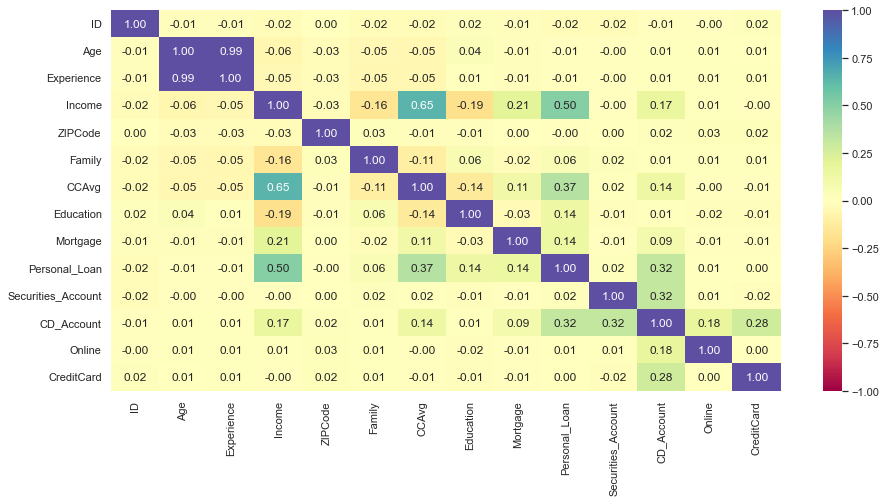

In [10]:
#Visualize correlation
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='Spectral', fmt='.2f');
plt.show()

# Correlation:
* Age and Experience have a strong pozitive correlation
* Income and CCAvg  has a pretty good pozitive relation
* Income and Personal_Loan has a somewhat correlation

In [11]:
#Look into the values
cols = ['Experience', 'Family', 'Education', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard']
for col in cols:
    print(df[col].value_counts())
    print("-"*15)

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64
---------------
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
---------------
1    2096
3    1501
2    1403
Name: Education, dtype: int64
---------------
0    4520
1     480
Name: Personal_Loan, dtype: int64
---------------
0    4478
1     522
Name: Securities_Account, dtype: int64
---------------
0    4698
1     302
Name: CD_Account, dtype: int64
---------------
1    2984
0    2016
Name: Online, dtype: int64
---------------
0 

Above columns looks as expected, No default values

In [12]:
#Let's drop the ID column, as it has no meaning for our purposes
df.drop('ID', axis=1, inplace=True)
df.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


ID column is dropped, now we have 13 columns

# Univariate analysis

In [14]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

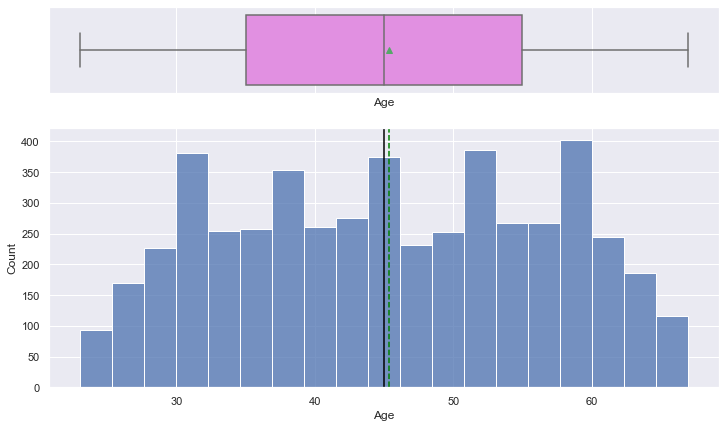

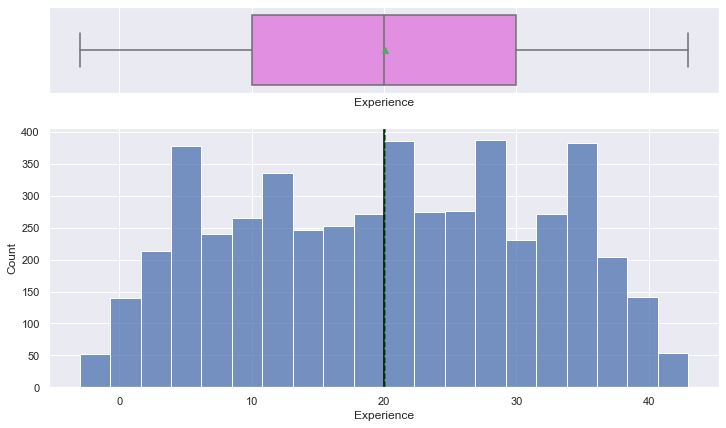

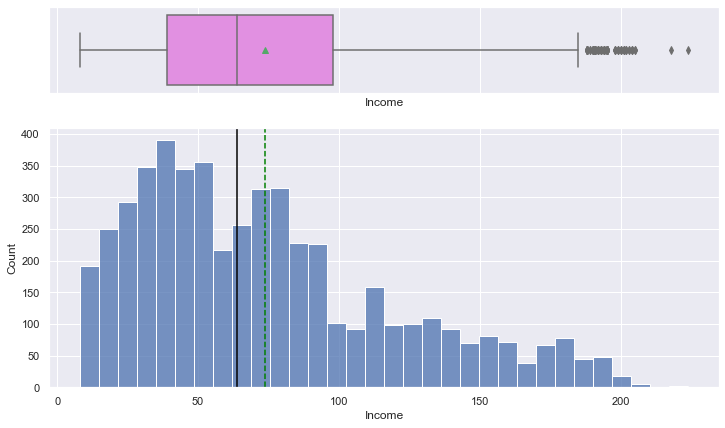

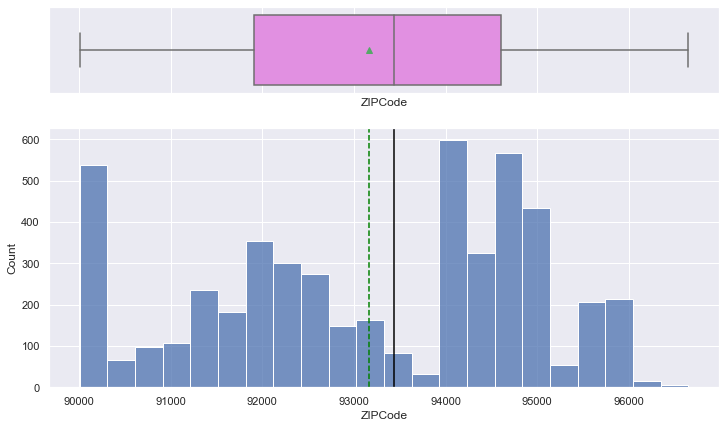

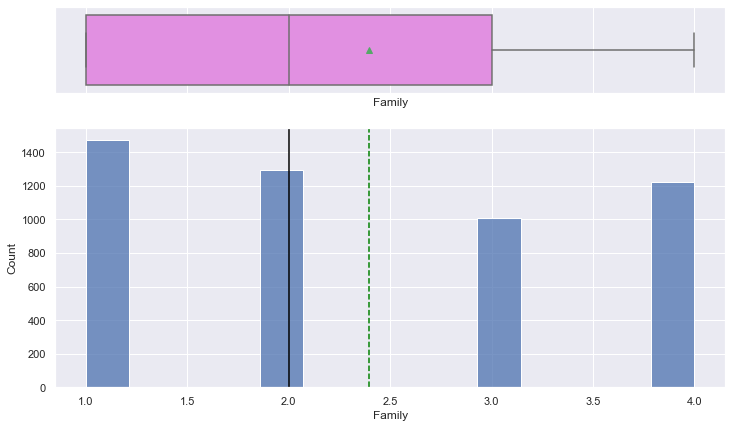

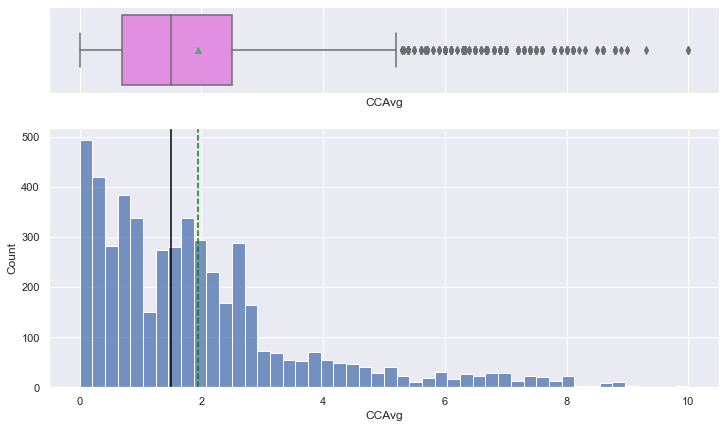

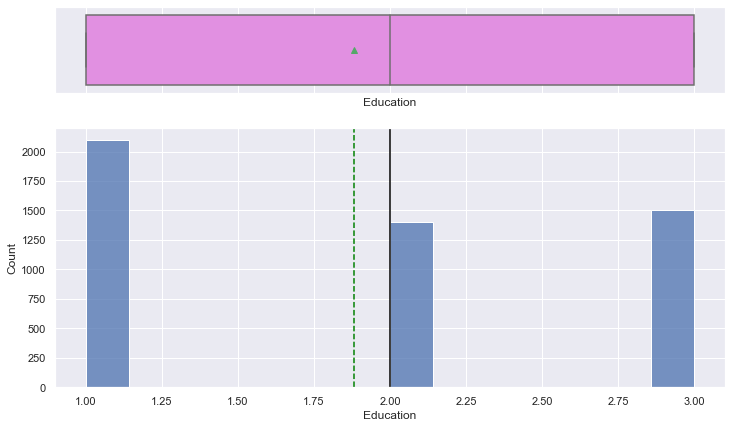

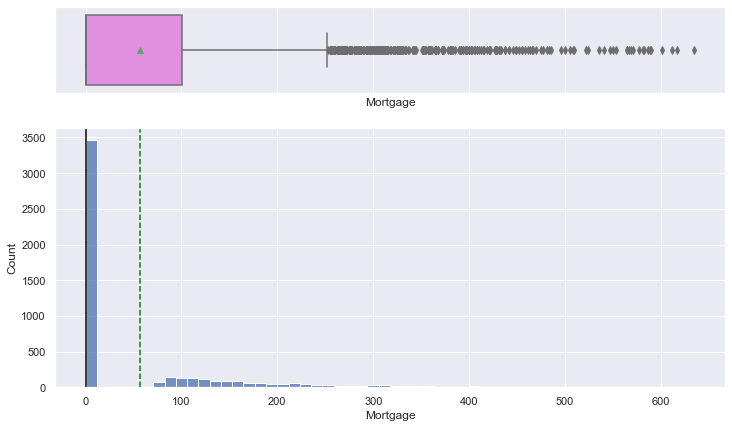

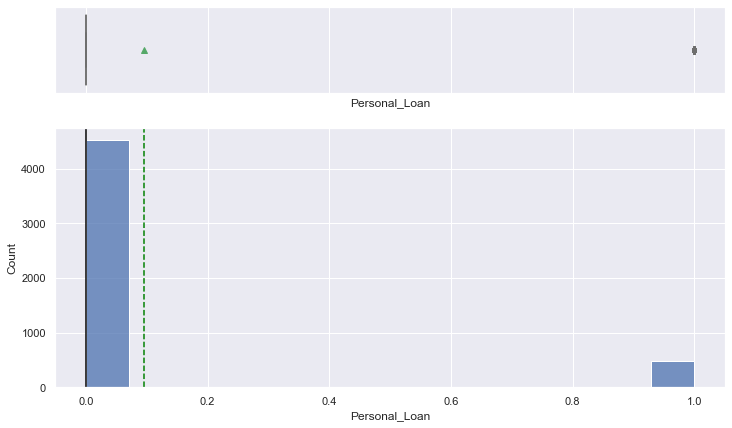

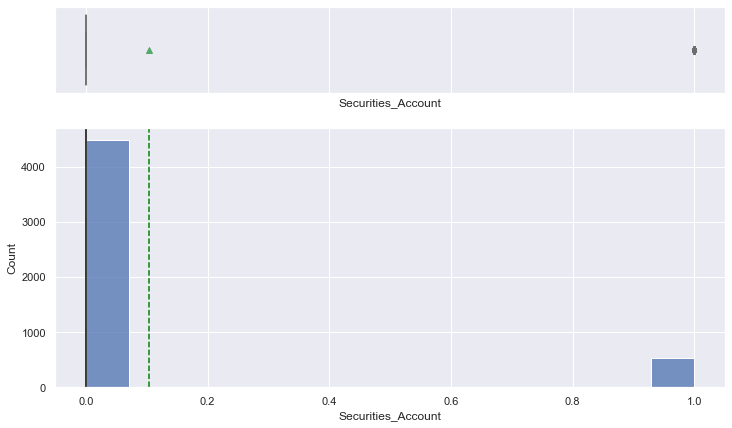

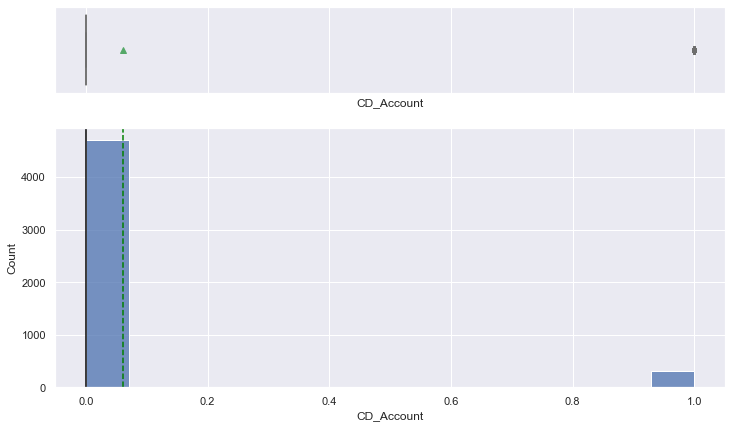

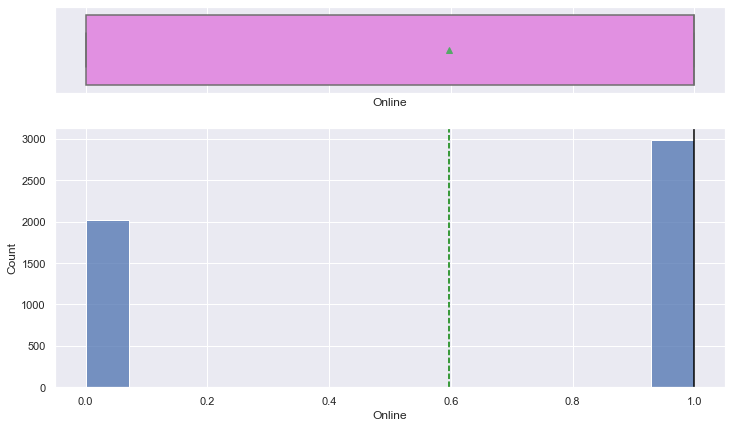

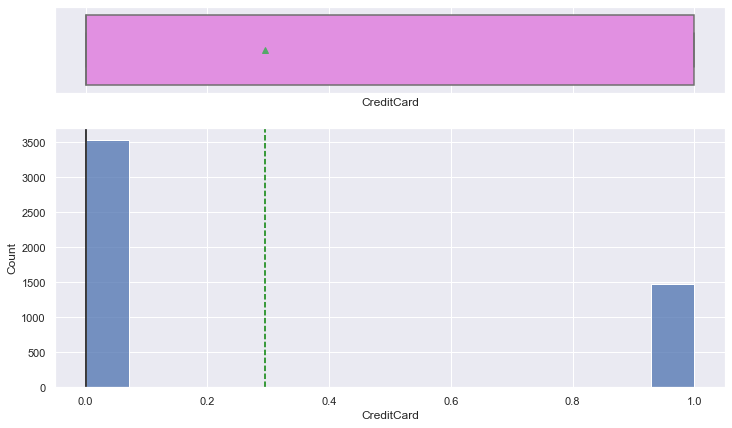

In [15]:
for col in df.columns:
    histogram_boxplot(df, col)
    plt.show()

* Age and Experience are pretty close to Normal Distribution shape, and no outliers
* Income, Mortgage and CCAvg are rightly skewed and have outliers on the right whisker
* Most of the customers has Undergraduate education
* Customers whoc didn't obtain a personal loan or Securities Account or CD Accounts or CreditCards is the majority
* Customers prefer to use Online banking

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5));
    else:
        plt.figure(figsize=(n + 1, 5));

    plt.xticks(rotation=90, fontsize=15);
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    );

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show();  # show the plot

## Plot Experience 

<Figure size 2160x1080 with 0 Axes>

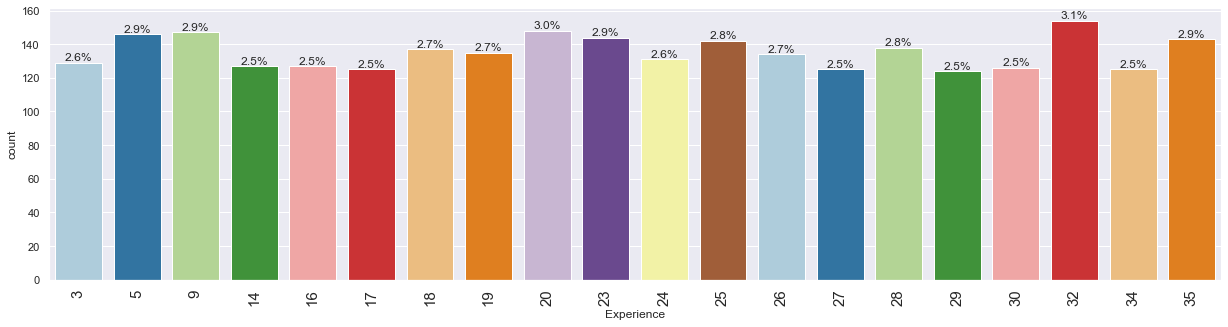

In [17]:
plt.figure(figsize=(30, 15));
labeled_barplot(df, 'Experience', perc=True, n=20);

Experience ranges betweeb 3 to 35 years.
32 years of Experience is the majority followed by 20, 5, 23, 35 years

## Plot Age

<Figure size 2160x1080 with 0 Axes>

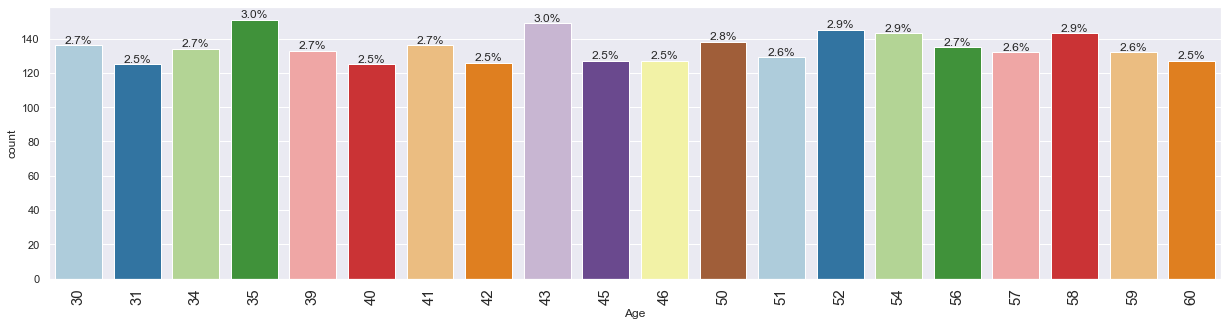

In [18]:
plt.figure(figsize=(30, 15));
labeled_barplot(df, 'Age', perc=True, n=20);

35 and 43 years old customers is the majority, followed by customers after 50

## Plot Family

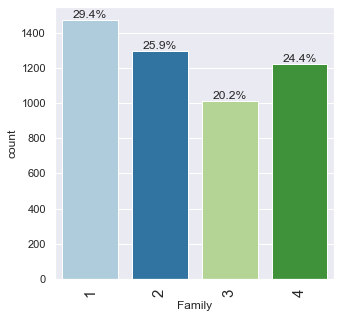

In [19]:
labeled_barplot(df, 'Family', perc=True);

A single family members is 29.4%, followed by 2 and 4 family sizes

## Plot Personal_Loan

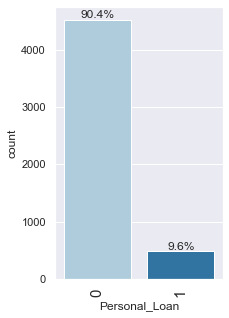

In [20]:
labeled_barplot(df, 'Personal_Loan', perc=True);

9.6% of customers have acepted the Loan, while > 90% did not. 

## Plot Securities_Account

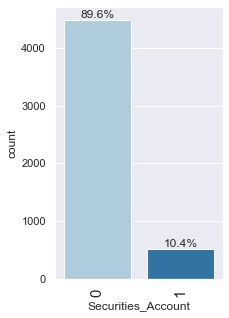

In [21]:
labeled_barplot(df, 'Securities_Account', perc=True);

Only 10.4 % customers has Security Accounts

## Plot CD_Account

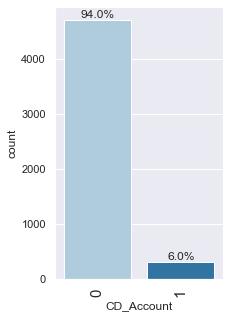

In [22]:
labeled_barplot(df, 'CD_Account', perc=True);

Only 6% of customers has CD_Account

## Plot CreditCard

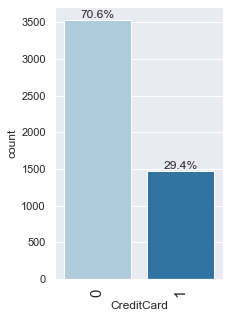

In [23]:
labeled_barplot(df, 'CreditCard', perc=True);

29.4% of customers obtained the creditcard from different banks, excluding All life Bank.

## Plot Online

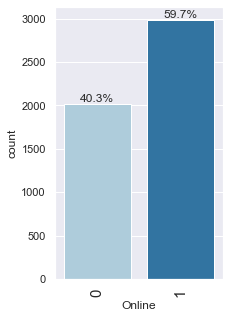

In [24]:
labeled_barplot(df, 'Online', perc=True);

More than half of the customers, 59.7% use Online Banking

#  Bivariate Analysis

<Figure size 1800x1296 with 0 Axes>

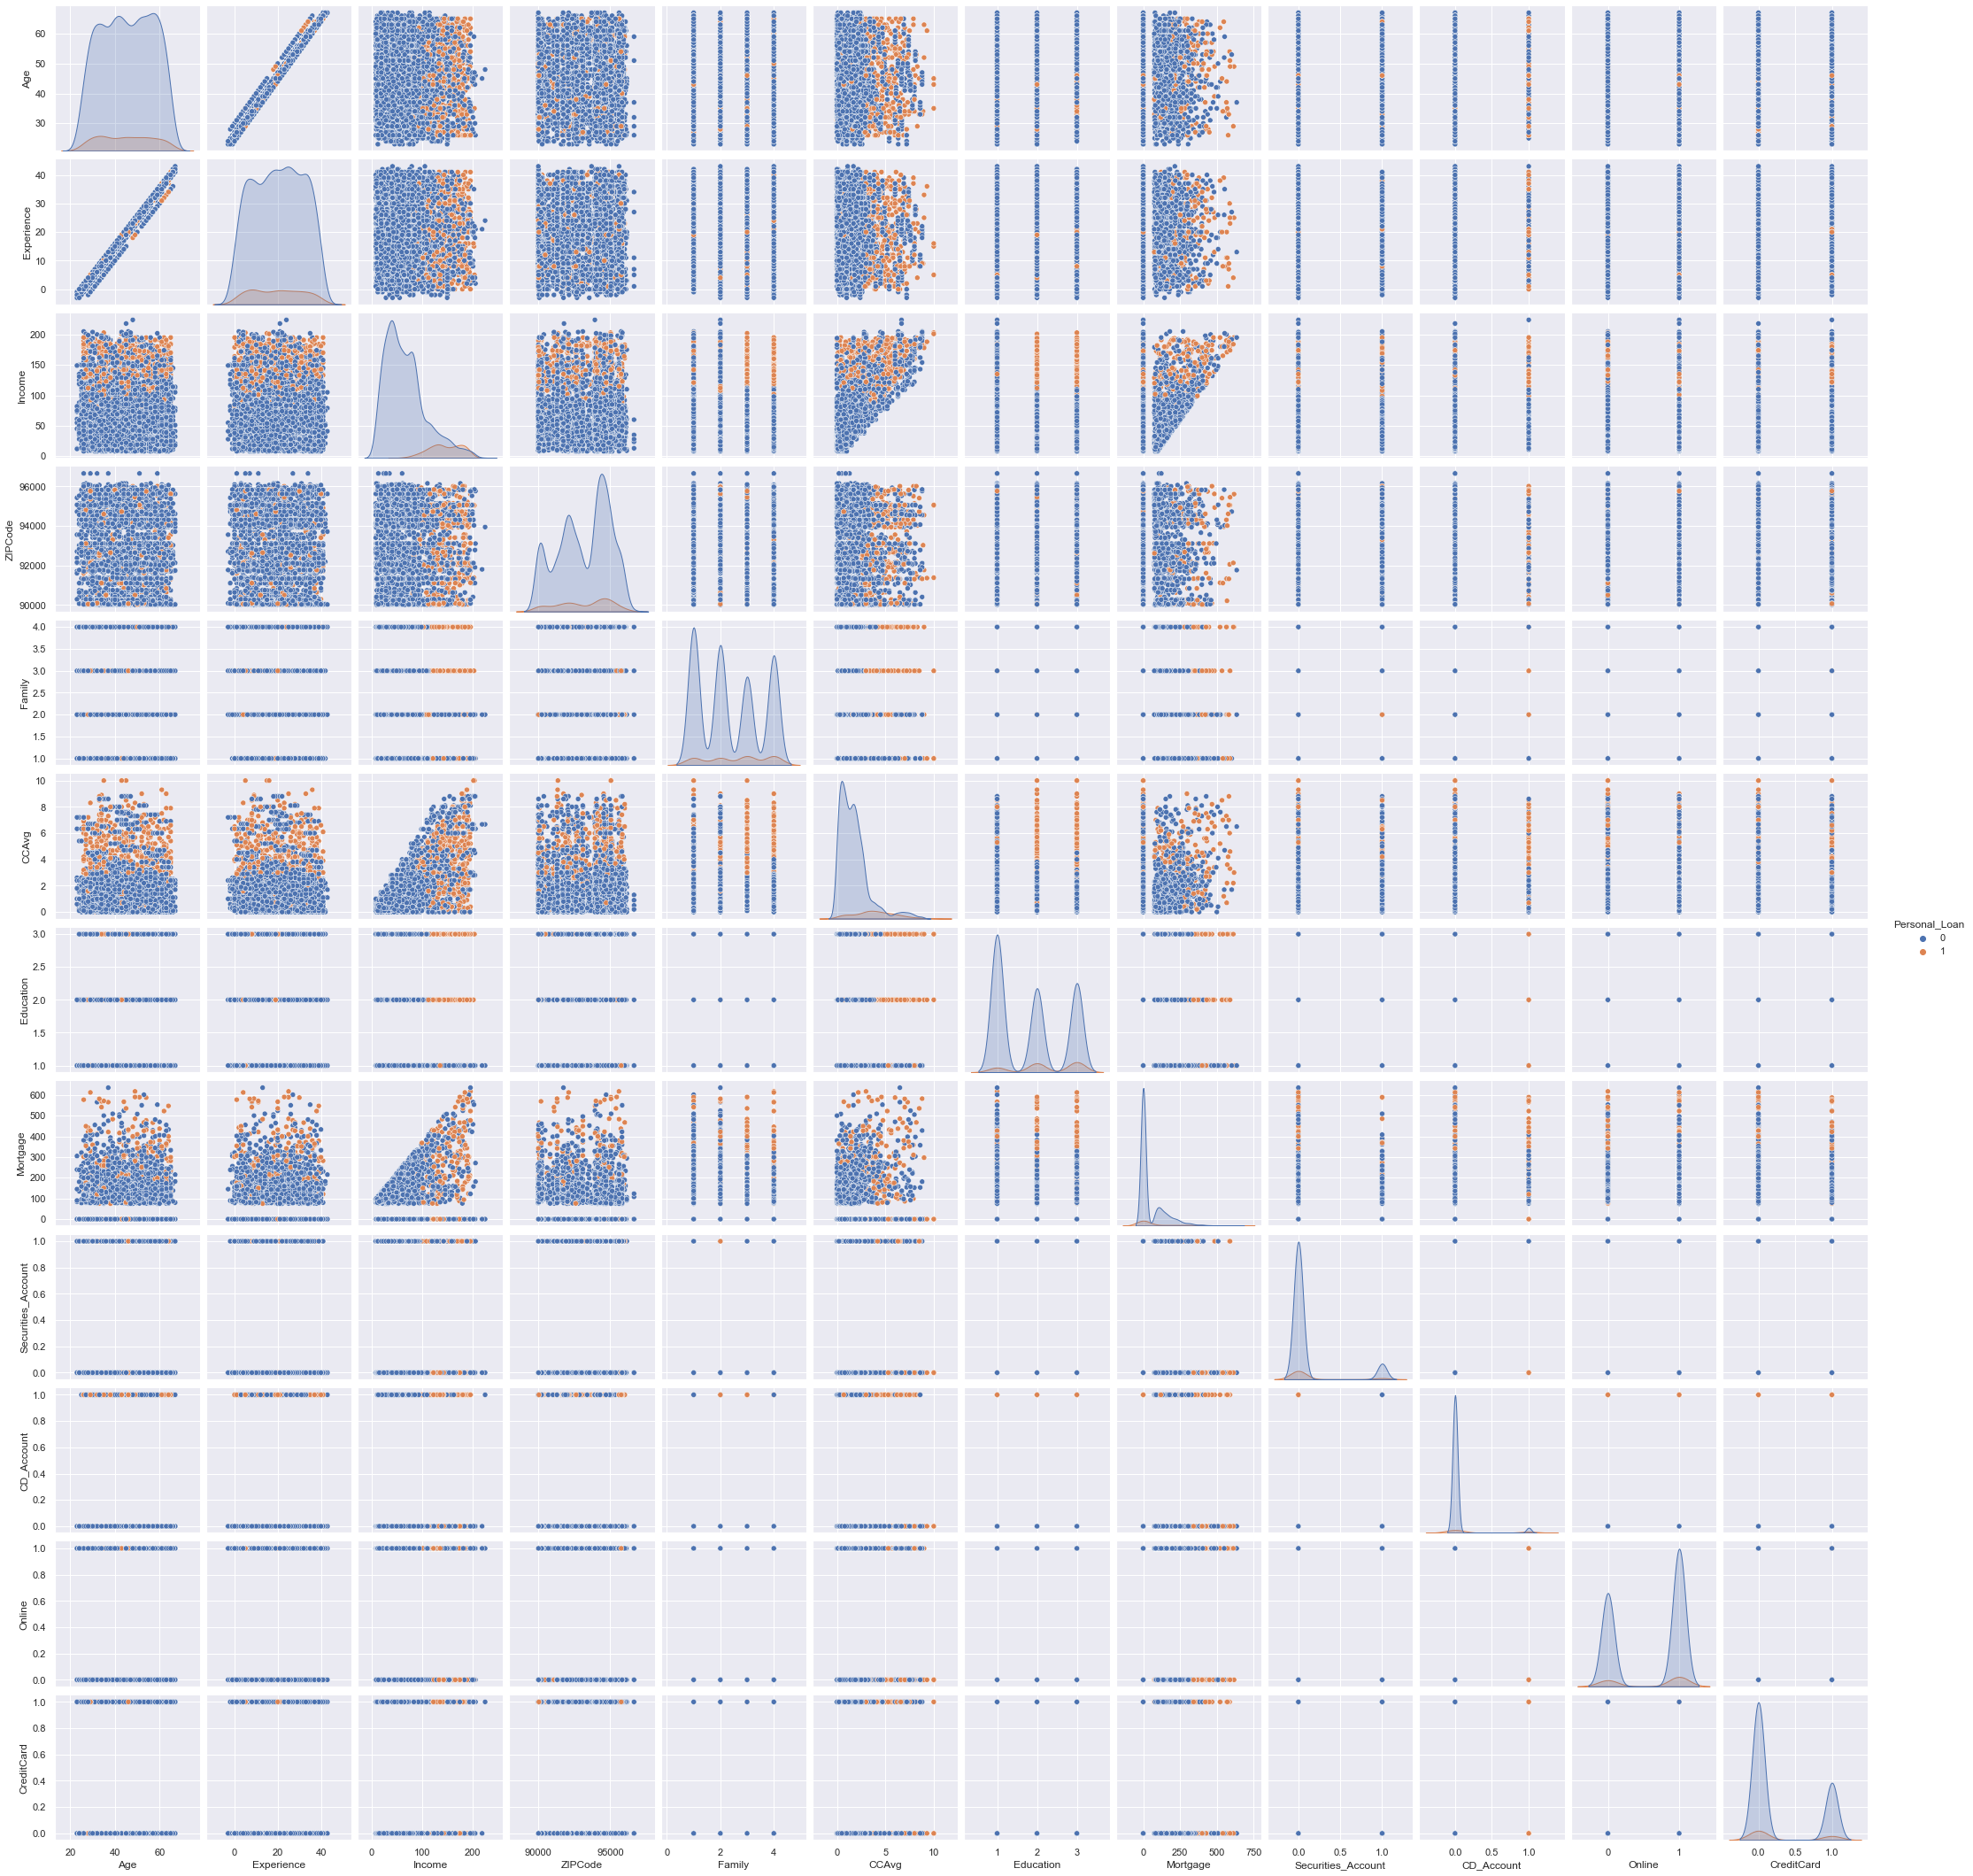

In [25]:
plt.figure(figsize=(25,18))
sns.pairplot(df, hue="Personal_Loan")
plt.show()

No much of a correlation between columns but it's obvious Age and Experince are positively related.

As higher the Income and Education the defaulters are visible.

In [26]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

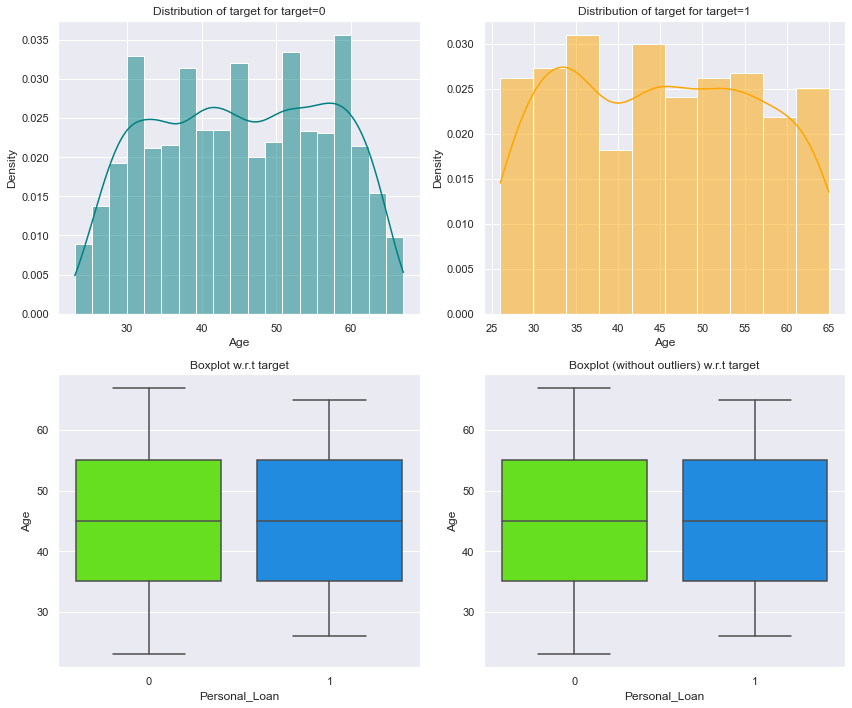

In [27]:
distribution_plot_wrt_target(df, "Age", "Personal_Loan")

Age column has no Outliers, and mean for each category is the same. Non-accepting customers have wider range of ages.

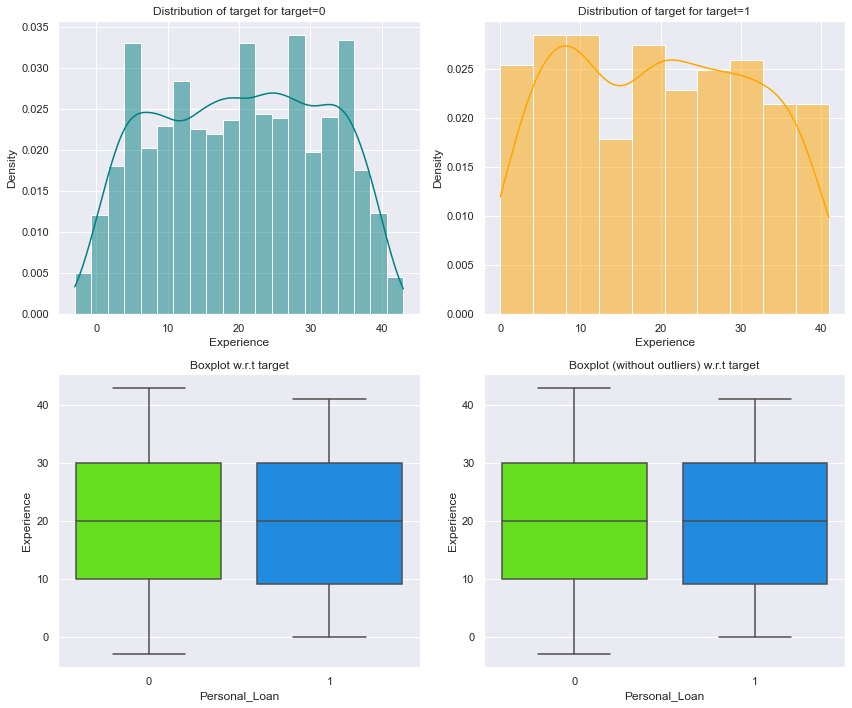

In [28]:
distribution_plot_wrt_target(df, "Experience", "Personal_Loan")

Experince column has no Outliers, and mean for each category is the same. Non-accepting customers have wider range Experiences.

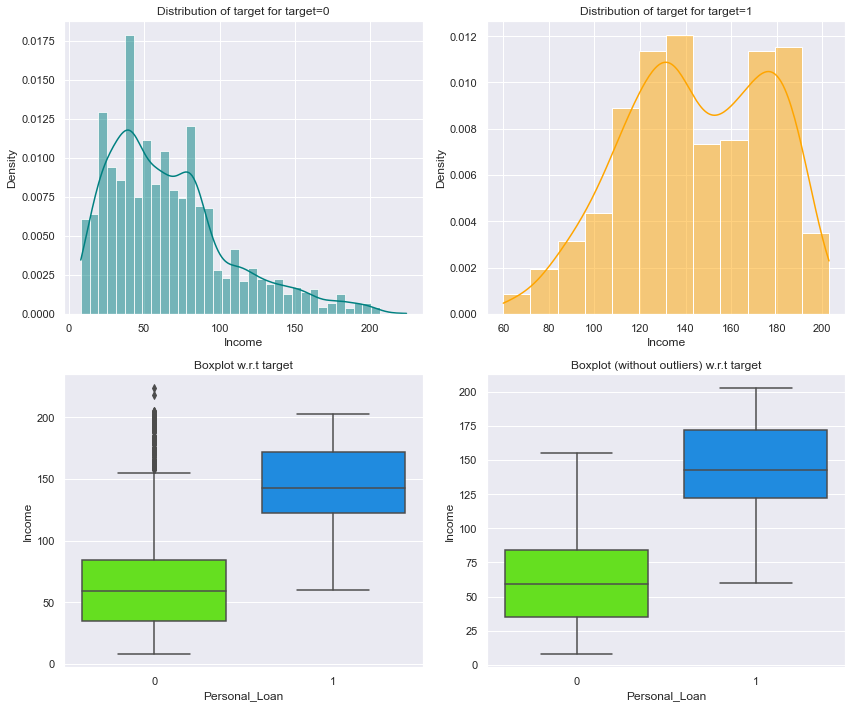

In [29]:
distribution_plot_wrt_target(df, "Income", "Personal_Loan")

Customer who accepted the Loan have much higher Income than who didn't

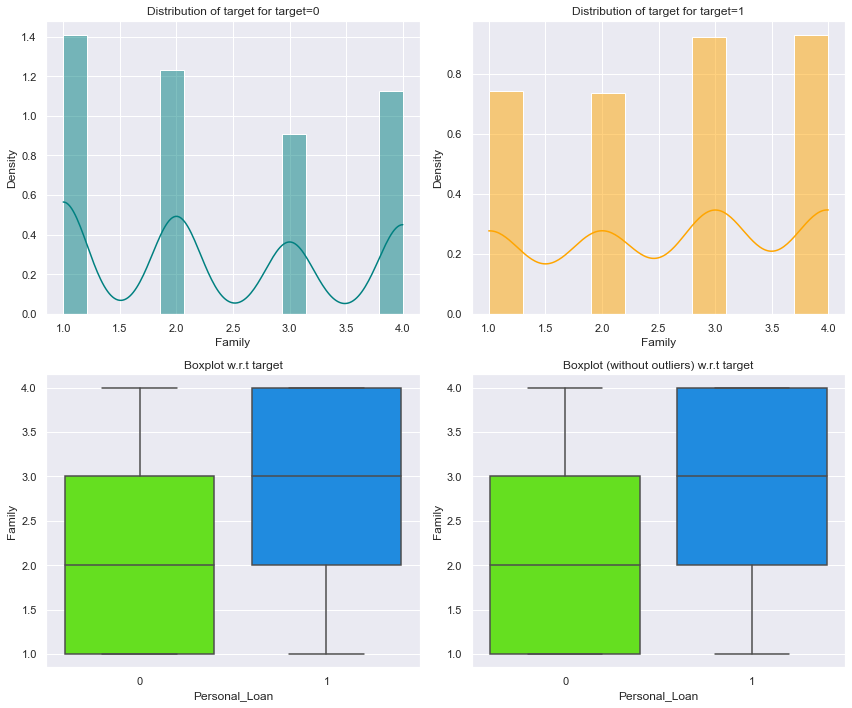

In [30]:
distribution_plot_wrt_target(df, "Family", "Personal_Loan")

Customers who accepted the loan tend to have more family members.

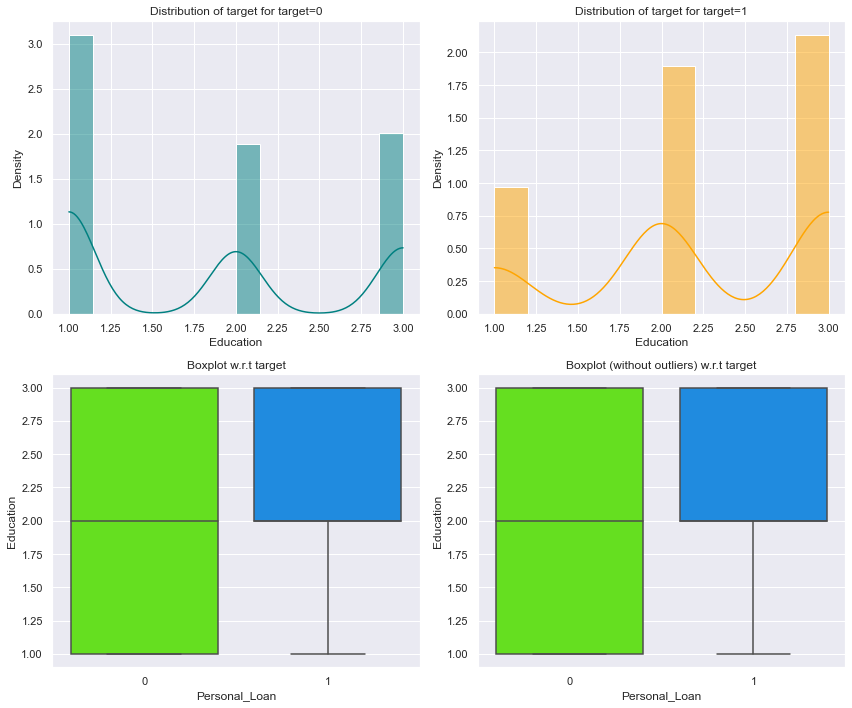

In [31]:
distribution_plot_wrt_target(df, "Education", "Personal_Loan")

Customers who has higher Education has accepted the loan. Although there is a wide range of  cutomers with all education levels that didn't accept the offer.

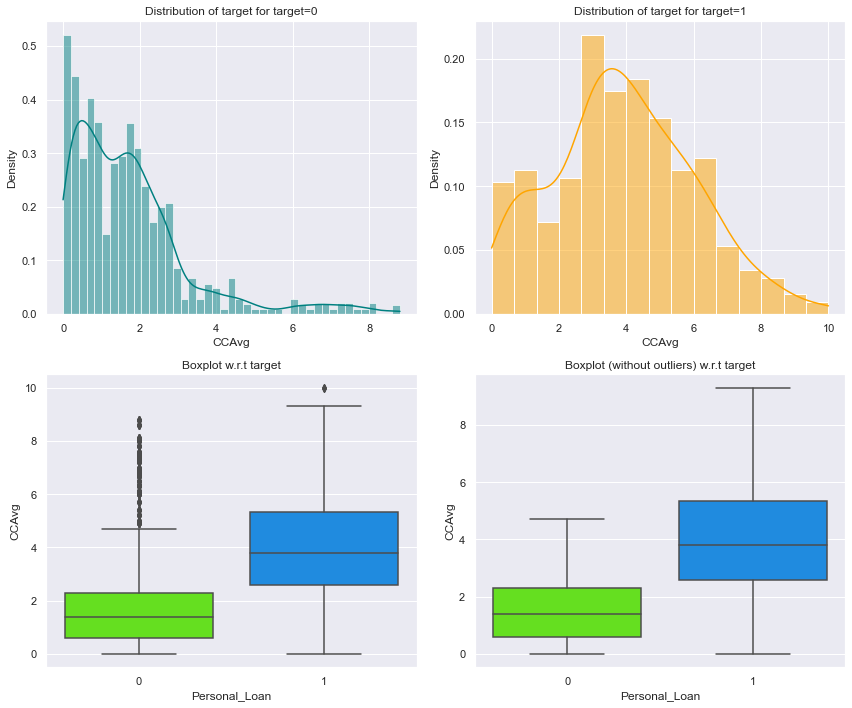

In [32]:
distribution_plot_wrt_target(df, "CCAvg", "Personal_Loan")

Customers who accepted the loan have higher spending on credit cards

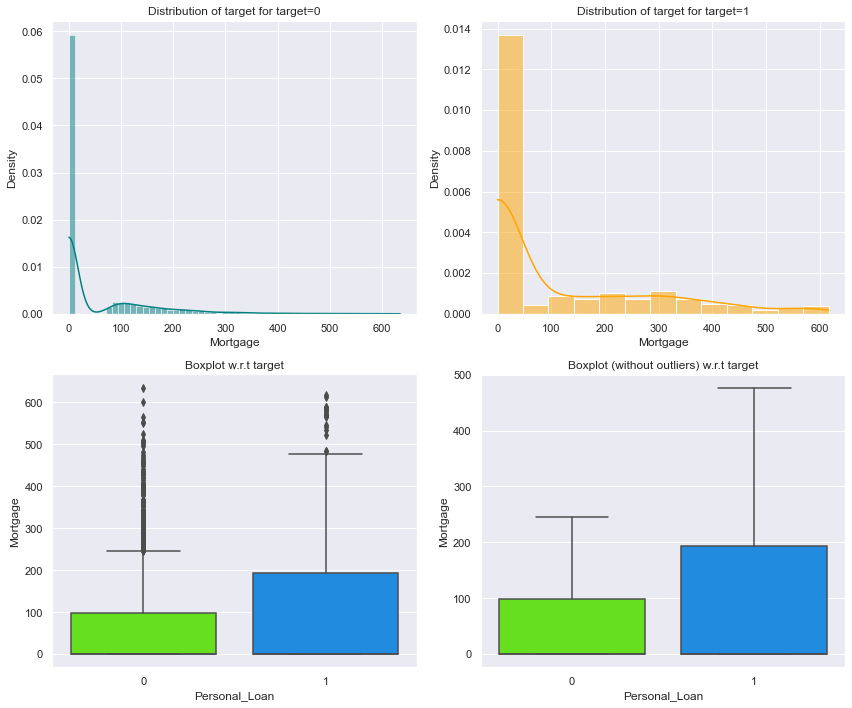

In [33]:
distribution_plot_wrt_target(df, "Mortgage", "Personal_Loan")

Thre is no obvious picture that having a Mortgage causes the Clients to obtain the Loan. Although who accepted, have a wider range of Mortgage amount.

In [34]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal_Loan     0    1   All
Age                           
All            4520  480  5000
34              116   18   134
30              119   17   136
36               91   16   107
63               92   16   108
35              135   16   151
33              105   15   120
52              130   15   145
29              108   15   123
54              128   15   143
43              134   15   149
42              112   14   126
56              121   14   135
65               66   14    80
44              107   14   121
50              125   13   138
45              114   13   127
46              114   13   127
26               65   13    78
32              108   12   120
57              120   12   132
38              103   12   115
27               79   12    91
48              106   12   118
61              110   12   122
53              101   11   112
51              119   10   129
60              117   10   127
58              133   10   143
49              105   10   115
47      

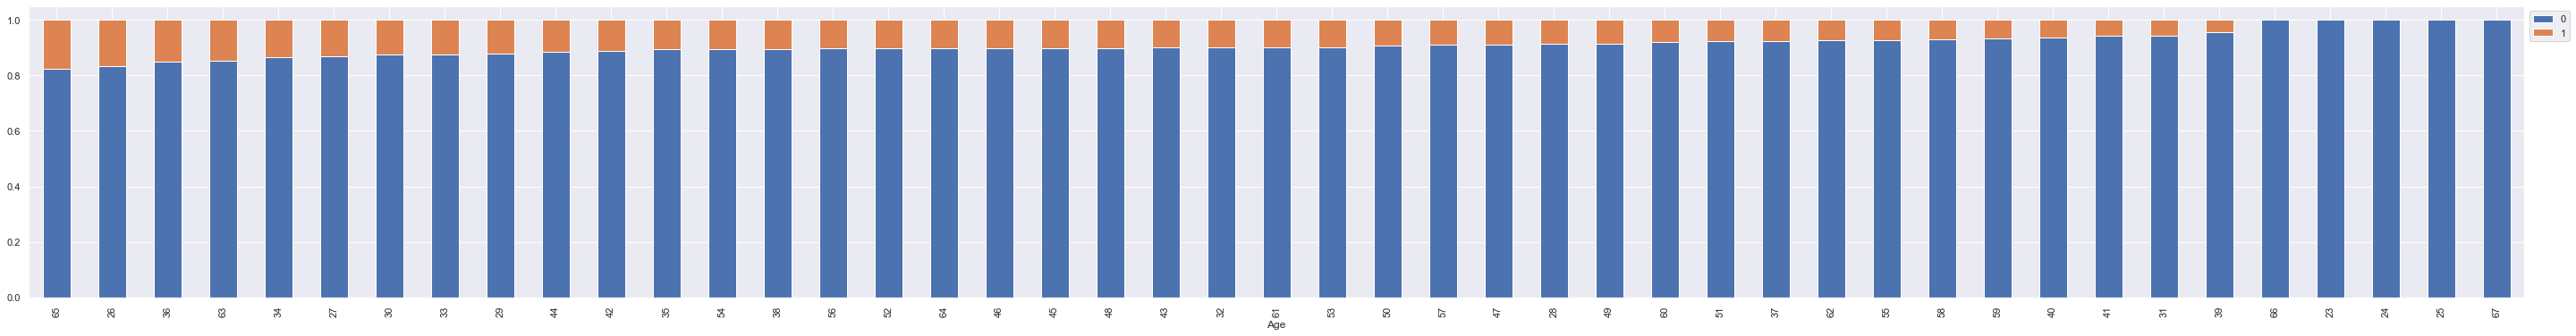

Personal_Loan     0    1   All
Experience                    
All            4520  480  5000
9               127   20   147
8               101   18   119
20              131   17   148
3               112   17   129
12               86   16   102
32              140   14   154
19              121   14   135
5               132   14   146
25              128   14   142
26              120   14   134
37              103   13   116
11              103   13   116
16              114   13   127
30              113   13   126
22              111   13   124
35              130   13   143
23              131   13   144
36              102   12   114
29              112   12   124
7               109   12   121
6               107   12   119
18              125   12   137
31               92   12   104
28              127   11   138
21              102   11   113
13              106   11   117
17              114   11   125
34              115   10   125
39               75   10    85
27      

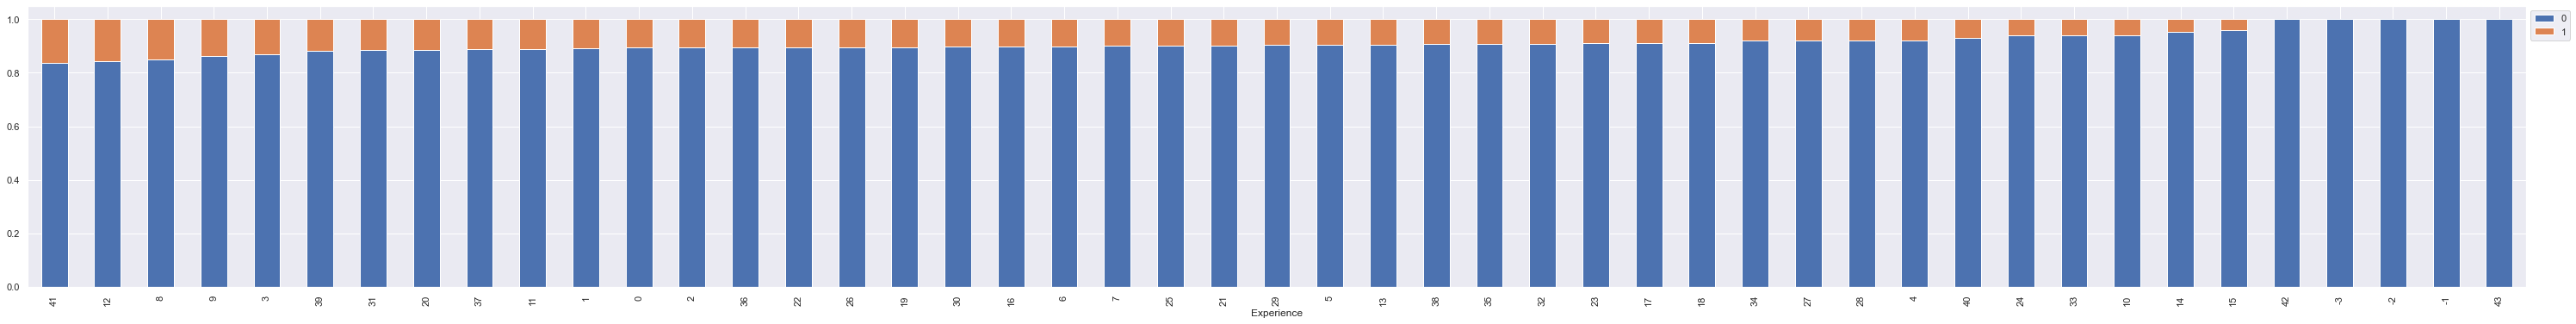

Personal_Loan     0    1   All
Income                        
All            4520  480  5000
130               8   11    19
182               2   11    13
158               8   10    18
135               8   10    18
179               8    9    17
141              15    9    24
154              12    9    21
123               9    9    18
184               3    9    12
142               7    8    15
131              11    8    19
129              15    8    23
172               3    8    11
173               5    8    13
170               4    8    12
180              10    8    18
115              19    8    27
125              16    7    23
164               6    7    13
188               3    7    10
83               67    7    74
114              23    7    30
161               9    7    16
122              17    7    24
133               8    7    15
132              11    7    18
191               6    7    13
134              13    7    20
111              15    7    22
190     

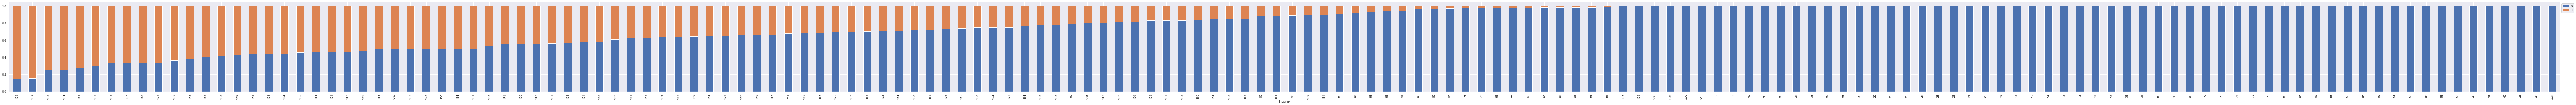

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94720           150   19   169
94305           114   13   127
92093            42    9    51
90095            63    8    71
...             ...  ...   ...
92866             8    0     8
92843             3    0     3
92835             3    0     3
92833             4    0     4
90005             5    0     5

[468 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


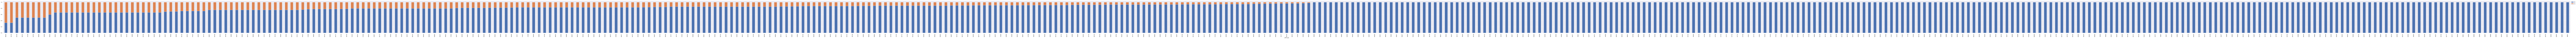

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


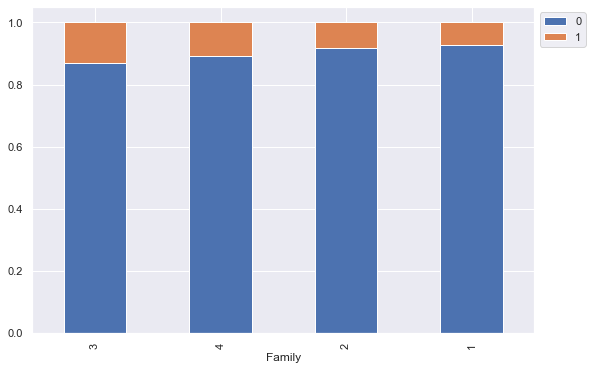

Personal_Loan     0    1   All
CCAvg                         
All            4520  480  5000
3.0              34   19    53
4.1               9   13    22
3.4              26   13    39
3.1               8   12    20
4.2               0   11    11
5.4               8   10    18
6.5               8   10    18
3.8              33   10    43
3.6              17   10    27
3.3              35   10    45
5.0               9    9    18
3.9              18    9    27
2.9              45    9    54
2.6              79    8    87
6.0              18    8    26
4.4               9    8    17
4.3              18    8    26
0.2             196    8   204
0.5             155    8   163
4.7              17    7    24
5.2               9    7    16
1.3             121    7   128
2.7              51    7    58
3.7              18    7    25
1.1              77    7    84
5.6               0    7     7
4.0              26    7    33
2.2             123    7   130
4.8               0    7     7
5.1     

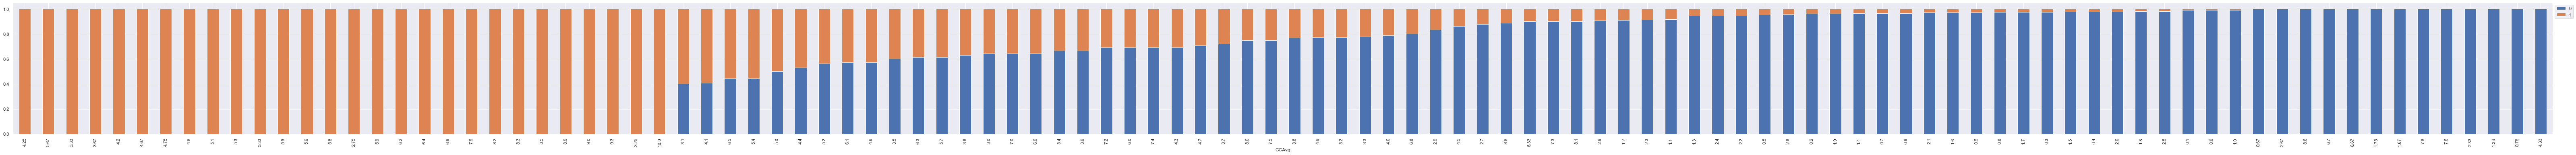

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


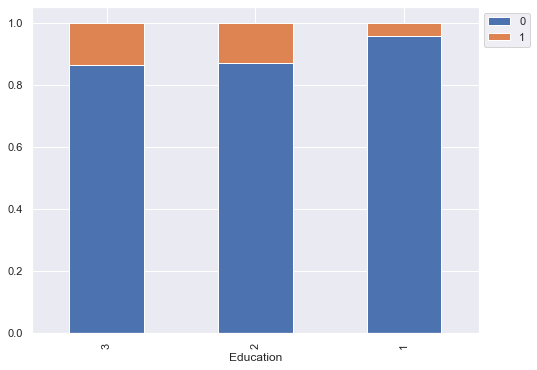

Personal_Loan     0    1   All
Mortgage                      
All            4520  480  5000
0              3150  312  3462
301               0    5     5
342               1    3     4
282               0    3     3
...             ...  ...   ...
276               2    0     2
156               5    0     5
278               1    0     1
280               2    0     2
248               3    0     3

[348 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


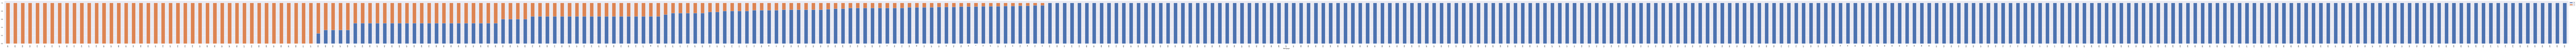

Personal_Loan     0    1   All
Personal_Loan                 
1                 0  480   480
All            4520  480  5000
0              4520    0  4520
------------------------------------------------------------------------------------------------------------------------


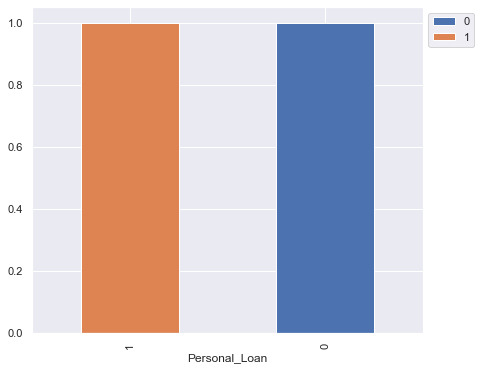

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


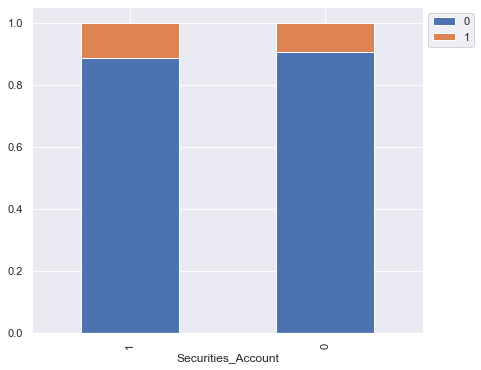

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


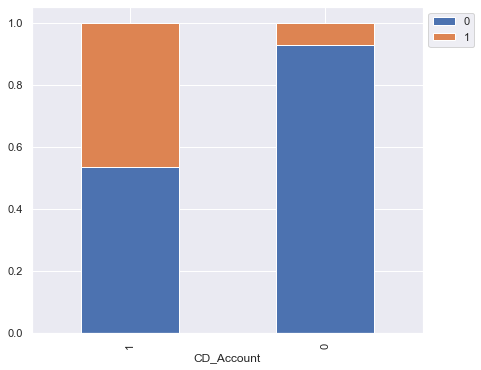

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


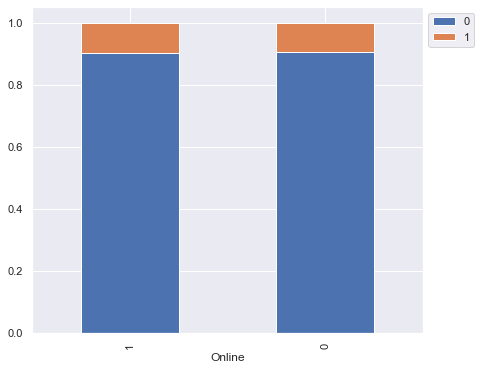

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


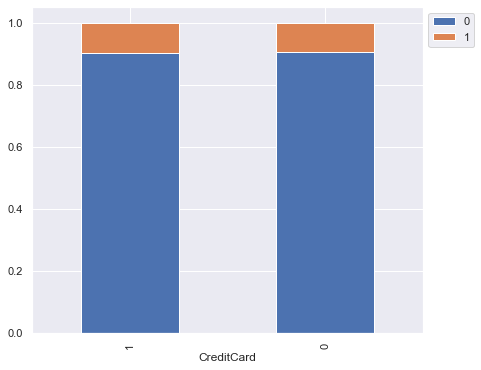

In [35]:
for col in df.columns:
    stacked_barplot(df, col, "Personal_Loan")

Most of the customers who accepted the Loan are in their 30's

Customers who make over 100K are more likely to get loan 

Customers from Berkeley, CA accepted the Loan the most
With more family members you tend to accept the Loan, as more expenses

Professionals acquire the Loan the most, which makes sense as their Income would be more qualified.

There is no sifnificant difference, but customers with Loan get to have a Security_Account

Customers accepting the Loan have a Certificate of Deposit 

Customers accepting the Loan prefer Onlline Banking

Both type of customers has same range of Credit Card usage from banks other than All life Bank

# Evaluation

In [36]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [37]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Data Preparation

In [38]:
#Creating a column for grouping the ZipCode field
df['City'] = ''

In [39]:
#Grouping zipCode into Major cities based on ZipCode. Found on Google
for i in range(0, df.shape[0]): 
    zip = str(df.iloc[i, 3])[0:3]
    if int(zip) >= 900 and int(zip) < 903:
        df.iloc[i, 13] = 'Los Angeles'
    elif int(zip) == 903:
        df.iloc[i, 13] = 'Inglewood' 
    elif int(zip) == 904:
        df.iloc[i, 13] = 'Santa Monica' 
    elif int(zip) == 905:
        df.iloc[i, 13] = 'Torrance'
    elif int(zip) == 906:
        df.iloc[i, 13] = 'Whittier'
    elif int(zip) >= 907 and int(zip) < 909:
        df.iloc[i, 13] = 'Long Beach'
    elif int(zip) >= 910 and int(zip) < 912:
        df.iloc[i, 13] = 'Pasadena'
    elif int(zip) == 912:
        df.iloc[i, 13] = 'Glendale'
    elif int(zip) == 913:
        df.iloc[i, 13] = 'Thousand Oaks'
    elif int(zip) == 914:
        df.iloc[i, 13] = 'Van Nuys 914'
    elif int(zip) == 915:
        df.iloc[i, 13] = 'Burbank 915'
    elif int(zip) == 916:
        df.iloc[i, 13] = 'North Hollywood'
    elif int(zip) == 917:
        df.iloc[i, 13] = 'Rancho Cucamonga'
    elif int(zip) == 918:
        df.iloc[i, 13] = 'Alhambra'
    elif int(zip) >= 919 and int(zip) < 922:
        df.iloc[i, 13] = 'San Diego'
    elif int(zip) == 922:
        df.iloc[i, 13] = 'Indio'
    elif int(zip) >= 923 and int(zip) < 925:
        df.iloc[i, 13] = 'San Bernardino'
    elif int(zip) == 925:
        df.iloc[i, 13] = 'Riverside'
    elif int(zip) == 926:
        df.iloc[i, 13] = 'Irvine'
    elif int(zip) == 927:
        df.iloc[i, 13] = 'Santa Ana'
    elif int(zip) == 928:
        df.iloc[i, 13] = 'Anaheim'
    elif int(zip) == 930:
        df.iloc[i, 13] = 'Ventura'
    elif int(zip) == 931:
        df.iloc[i, 13] = 'Santa Barbara'
    elif int(zip) >= 932 and int(zip) < 934:
        df.iloc[i, 13] = 'Bakerfield'
    elif int(zip) == 934:
        df.iloc[i, 13] = 'San Luis Obispo'
    elif int(zip) == 935:
        df.iloc[i, 13] = 'Mojave'
    elif int(zip) >= 936 and int(zip) < 939:
        df.iloc[i, 13] = 'Fresno'
    elif int(zip) == 939:
        df.iloc[i, 13] = 'Salinas'
    elif int(zip) >= 940 and int(zip) < 942:
        df.iloc[i, 13] = 'San Francisco'
    elif int(zip) == 942 or int(zip) == 956 or int(zip) == 957 or int(zip) == 958: 
        df.iloc[i, 13] = 'Sacramento'
    elif int(zip) == 943:
        df.iloc[i, 13] = 'Palo Alto'
    elif int(zip) == 944:
        df.iloc[i, 13] = 'San Mateo'
    elif int(zip) >= 945 and int(zip) < 947:
        df.iloc[i, 13] = 'Oakland'
    elif int(zip) == 947:
        df.iloc[i, 13] = 'Berkley'
    elif int(zip) == 948:
        df.iloc[i, 13] = 'Richmond'
    elif int(zip) == 949:
        df.iloc[i, 13] = 'San Rafael'
    elif int(zip) >= 950 and int(zip) < 952:
        df.iloc[i, 13] = 'San Jose'
    elif int(zip) >= 952 or int(zip) >= 954:
        df.iloc[i, 13] = 'Stockton'
    elif int(zip) == 954:
        df.iloc[i, 13] = 'Santa Rosa'
    elif int(zip) == 955:
        df.iloc[i, 13] = 'Eureka'
    elif int(zip) == 959:
        df.iloc[i, 13] = 'Marysville'
    elif int(zip) == 960:
        df.iloc[i, 13] = 'Redding'
    elif int(zip) == 960:
        df.iloc[i, 13] = 'Reno'

In [40]:
df.City.value_counts()

San Diego           568
Los Angeles         536
San Francisco       499
San Jose            363
Oakland             353
Sacramento          350
Palo Alto           257
Berkley             251
Thousand Oaks       222
Irvine              182
Rancho Cucamonga    150
Stockton            149
Santa Barbara       134
Salinas             102
Pasadena            100
Anaheim              81
San Bernardino       77
San Rafael           75
Long Beach           64
Santa Ana            62
Ventura              58
Riverside            49
San Luis Obispo      43
Whittier             38
Mojave               36
Santa Monica         35
North Hollywood      29
Torrance             28
Fresno               26
Bakerfield           18
Richmond             17
San Mateo            13
Van Nuys 914         13
Indio                10
Glendale              7
Alhambra              3
Inglewood             2
Name: City, dtype: int64

In [41]:
# Checking for any missing values on City
df[df.City=='']

Empty DataFrame
Columns: [Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard, City]
Index: []

In [42]:
# Let's drop ZIPCode column
df.drop('ZIPCode', axis=1, inplace=True)

In [43]:
df[df.Experience<0]

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
89     25          -1     113       4   2.30          3         0   
226    24          -1      39       2   1.70          2         0   
315    24          -2      51       3   0.30          3         0   
451    28          -2      48       2   1.75          3        89   
524    24          -1      75       4   0.20          1         0   
536    25          -1      43       3   2.40          2       176   
540    25          -1     109       4   2.30          3       314   
576    25          -1      48       3   0.30          3         0   
583    24          -1      38       2   1.70          2         0   
597    24          -2     125       2   7.20          1         0   
649    25          -1      82       4   2.10          3         0   
670    23          -1      61       4   2.60          1       239   
686    24          -1      38       4   0.60          2         0   
793    24          -2     150       2   2.00          1         0   
889    24          -2      82       2   1.60          3         0   
909    23          -1     149       1   6.33          1       305   
1173   24          -1      35       2   1.70          2         0   
1428   25          -1      21       4   0.40          1        90   
1522   25          -1     101       4   2.30          3       256   
1905   25          -1     112       2   2.00          1       241   
2102   25          -1      81       2   1.60          3         0   
2430   23          -1      73       4   2.60          1         0   
2466   24          -2      80       2   1.60          3         0   
2545   25          -1      39       3   2.40          2         0   
2618   23          -3      55       3   2.40          2       145   
2717   23          -2      45       4   0.60          2         0   
2848   24          -1      78       2   1.80          2         0   
2876   24          -2      80       2   1.60          3       238   
2962   23          -2      81       2   1.80          2         0   
2980   25          -1      53       3   2.40          2         0   
3076   29          -1      62       2   1.75          3         0   
3130   23          -2      82       2   1.80          2         0   
3157   23          -1      13       4   1.00          1        84   
3279   26          -1      44       1   2.00          2         0   
3284   25          -1     101       4   2.10          3         0   
3292   25          -1      13       4   0.40          1         0   
3394   25          -1     113       4   2.10          3         0   
3425   23          -1      12       4   1.00          1        90   
3626   24          -3      28       4   1.00          3         0   
3796   24          -2      50       3   2.40          2         0   
3824   23          -1      12       4   1.00          1         0   
3887   24          -2     118       2   7.20          1         0   
3946   25          -1      40       3   2.40          2         0   
4015   25          -1     139       2   2.00          1         0   
4088   29          -1      71       2   1.75          3         0   
4116   24          -2     135       2   7.20          1         0   
4285   23          -3     149       2   7.20          1         0   
4411   23          -2      75       2   1.80          2         0   
4481   25          -2      35       4   1.00          3         0   
4514   24          -3      41       4   1.00          3         0   
4582   25          -1      69       3   0.30          3         0   
4957   29          -1      50       2   1.75          3         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
89                0                   0           0       0           1   
226               0                   0           0       0           0   
315               0                   0           0       1           0   
451               0                   0         

The above values must have been entered mistakenly, let's assume those supposed to be pozitive numbers, and data enter analyst made a typo adding "-" sign

In [44]:
#Assigning an absolute values to Experience field
df.Experience = np.abs(df.Experience)

In [45]:
df[df.Experience<0]

Empty DataFrame
Columns: [Age, Experience, Income, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard, City]
Index: []

No Negative values anymore

In [46]:
# Let's treat City with HotEncoding
df = pd.get_dummies(df, drop_first=True)

In [47]:
df.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities_Account  CD_Account  Online  CreditCard  City_Anaheim  \
0                   1           0       0           0             0   
1                   1           0       0           0             0   
2                   0           0       0           0             0   
3                   0           0       0           0             0   
4                   0           0       0           1             0   

   City_Bakerfield  City_Berkley  City_Fresno  City_Glendale  City_Indio  \
0                0             0            0              0           0   
1                0             0            0              0           0   
2                0             1            0              0           0   
3                0             0            0              0           0   
4                0             0            0              0           0   

   City_Inglewood  City_Irvine  City_Long Beach  City_Los Angeles  \
0               0            0                0                 0   
1               0            0                0                 1   
2               0            0                0                 0   
3               0            0                0                 0   
4               0            0                0                 0   

   City_Mojave  City_North Hollywood  City_Oakland  City_Palo Alto  \
0            0                     0             0               0   
1            0                     0             0               0   
2            0                     0             0               0   
3            0                     0             0               0   
4            0                     0             0               0   

   City_Pasadena  City_Rancho Cucamonga  City_Richmond  City_Riverside  \
0              1                      0              0               0   
1              0                      0              0               0   
2              0                      0              0               0   
3              0                      0              0               0   
4              0                      0              0               0   

   City_Sacramento  City_Salinas  City_San Bernardino  City_San Diego  \
0                0             0                    0               0   
1                0             0                    0               0   
2                0             0                    0               0   
3                0             0                    0               0   
4                0             0                    0               0   

   City_San Francisco  City_San Jose  City_San Luis Obispo  City_San Mateo  \
0                   0              0                     0               0   
1                   0              0                     0               0   
2                   0              0                     0               0   
3                   1              0                     0               0   
4                   0              0                     0               0   

   City_San Rafael  City_Santa Ana  City_Santa Barbara  City_Santa Monica  \
0                0               0                   0                  0   
1                0               0                   0                  0   
2                0               0                   0                  0   
3                0               0                   0                  0   
4                0               0                   0    

Data looks good and ready for building the model

# Building a Model

### Let's point out that the problem statement is about helping the marketing department to identify the potential customers who have a higher probability of purchasing the loan.
So identifying False Negative Rate is crucially important here, as we don't want to lose any potential customers.
(RECALL) False Negative Rate = TP/(TP+FN)

In [48]:
#Preparing model dataset
X = df.drop("Personal_Loan", axis=1)
Y = df["Personal_Loan"]

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1
)

In [49]:
#Creating the model and fitting train data
model = LogisticRegression(solver="newton-cg", random_state=1)
lg = model.fit(X_train, y_train)

In [50]:
#Getting the coefficients
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

Age  Experience  Income    Family     CCAvg  Education  Mortgage  \
coef -0.013554    0.019576  0.0526  0.720604  0.166061   1.654119  0.000917   

      Securities_Account  CD_Account    Online  CreditCard  City_Anaheim  \
coef           -0.854944    3.269336 -0.524547   -0.999894     -0.013627   

      City_Bakerfield  City_Berkley  City_Fresno  City_Glendale  City_Indio  \
coef         0.614172      0.241966    -0.115402       0.592961    0.733033   

      City_Inglewood  City_Irvine  City_Long Beach  City_Los Angeles  \
coef       -0.011994    -0.026052         0.060088         -0.269757   

      City_Mojave  City_North Hollywood  City_Oakland  City_Palo Alto  \
coef     0.149543             -0.594893     -0.225278        0.093711   

      City_Pasadena  City_Rancho Cucamonga  City_Richmond  City_Riverside  \
coef       0.189074              -0.455165       0.672167        0.498562   

      City_Sacramento  City_Salinas  City_San Bernardino  City_San Diego  \
coef         -0.13613     -0.309358            -0.709349        0.023434   

      City_San Francisco  City_San Jose  City_San Luis Obispo  City_San Mateo  \
coef           -0.337514       0.120726             -0.580769        0.051148   

      City_San Rafael  City_Santa Ana  City_Santa Barbara  City_Santa Monica  \
coef         0.529269        0.141028            0.097201           -0.18352   

      City_Stockton  City_Thousand Oaks  City_Torrance  City_Van Nuys 914  \
coef      -0.816989            0.012315       0.320117          -0.125982   

      City_Ventura  City_Whittier  
coef      0.253854       0.396357

In [51]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

Age  Experience    Income      Family      CCAvg  \
Odds         0.986537    1.019769  1.054008    2.055674   1.180645   
Change_odd% -1.346259    1.976928  5.400800  105.567440  18.064548   

              Education  Mortgage  Securities_Account   CD_Account     Online  \
Odds           5.228470  1.000918            0.425307    26.293873   0.591824   
Change_odd%  422.847045  0.091787          -57.469312  2529.387298 -40.817642   

             CreditCard  City_Anaheim  City_Bakerfield  City_Berkley  \
Odds           0.367918      0.986466         1.848127      1.273750   
Change_odd%  -63.208154     -1.353441        84.812650     27.375034   

             City_Fresno  City_Glendale  City_Indio  City_Inglewood  \
Odds            0.891008       1.809337    2.081383        0.988078   
Change_odd%   -10.899224      80.933710  108.138333       -1.192207   

             City_Irvine  City_Long Beach  City_Los Angeles  City_Mojave  \
Odds            0.974284         1.061929          0.763565     1.161304   
Change_odd%    -2.571580         6.192947        -23.643490    16.130373   

             City_North Hollywood  City_Oakland  City_Palo Alto  \
Odds                     0.551621      0.798294        1.098242   
Change_odd%            -44.837867    -20.170599        9.824184   

             City_Pasadena  City_Rancho Cucamonga  City_Richmond  \
Odds              1.208130               0.634343       1.958477   
Change_odd%      20.813044             -36.565695      95.847722   

             City_Riverside  City_Sacramento  City_Salinas  \
Odds               1.646353         0.872729      0.733918   
Change_odd%       64.635288       -12.727120    -26.608174   

             City_San Bernardino  City_San Diego  City_San Francisco  \
Odds                    0.491964        1.023711            0.713542   
Change_odd%           -50.803557        2.371085          -28.645774   

             City_San Jose  City_San Luis Obispo  City_San Mateo  \
Odds              1.128316              0.559468        1.052478   
Change_odd%      12.831627            -44.053201        5.247843   

             City_San Rafael  City_Santa Ana  City_Santa Barbara  \
Odds                1.697691        1.151456            1.102082   
Change_odd%        69.769077       15.145645           10.208230   

             City_Santa Monica  City_Stockton  City_Thousand Oaks  \
Odds                  0.832335       0.441760            1.012392   
Change_odd%         -16.766500     -55.824012            1.239158   

             City_Torrance  City_Van Nuys 914  City_Ventura  City_Whittier  
Odds              1.377289           0.881630      1.288984       1.486400  
Change_odd%      37.728910         -11.836955     28.898396      48.639966

## Observations:
Age has a negative impact on Loan acceptance, elder customers avoid getting loans.

Number of family members, Education, CD_Account has a huge impact on Customers on accepting a loan.

Experience, Income size, Spending on credit cards, Mortgage and certain cities in CA as Richmond has a positive relationship in obtaining a personal_loan.

Age, Securities_Account, Online banking, CreditCards issued by other banks and certain cities like San_Bernardino have a negative impact.


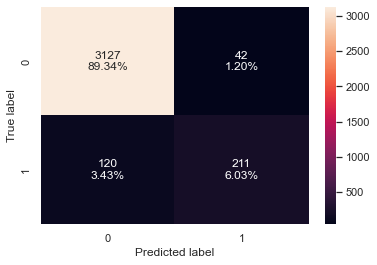

In [52]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [53]:
#Getting metrics on Training data
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.953714  0.637462   0.833992  0.722603

Recall is 64%, let's visualize that

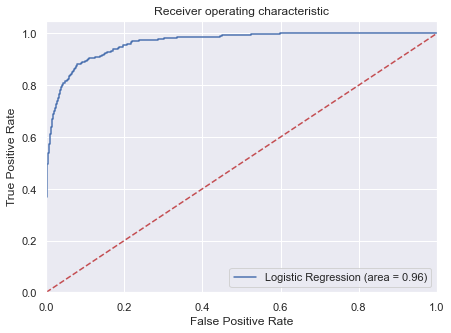

In [54]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [55]:
#Checking test data
#Getting metrics on Training data
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Testing performance:")
log_reg_model_test_perf

Testing performance:


Accuracy    Recall  Precision        F1
0     0.946  0.577181   0.826923  0.679842

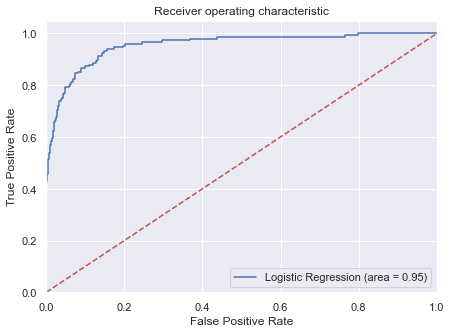

In [56]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Accuracy and Precision seems to be very close, however Recall and F1 score on test data is smaller than on training, a sign of overfitting!

## Let's try to improve Recall performance using AUC/ROC threshold

In [57]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.13372741160141446


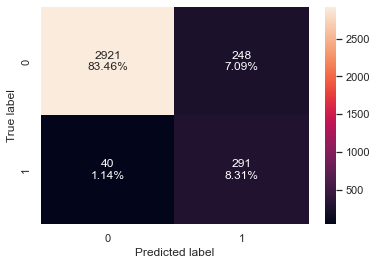

In [58]:
#Checking again with AUC threshold 

# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

1.14% of False Negative results, and 7% of False Positive results

In [59]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.917714  0.879154   0.539889  0.668966

Great improvement on Recall. Let's check on test data

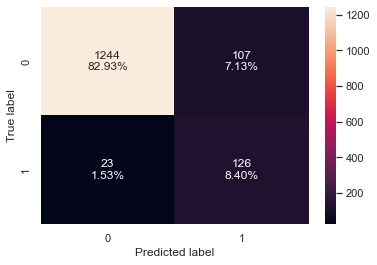

In [60]:
#Checking again with AUC threshold 

# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

1.53% of False Negative results, and 7% of False Positive results

In [61]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Testing performance:")
log_reg_model_test_perf_threshold_auc_roc

Testing performance:


Accuracy    Recall  Precision        F1
0  0.913333  0.845638   0.540773  0.659686

Yay, Train and test data's recall is pretty close, so no overfitting!

## For further improvement, let's try Precision-Recall curve and see if we can find a better threshold 

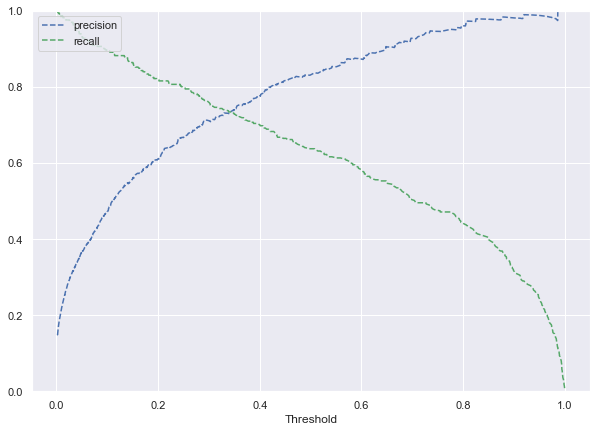

In [62]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [63]:
# setting the threshold
optimal_threshold_curve = 0.37

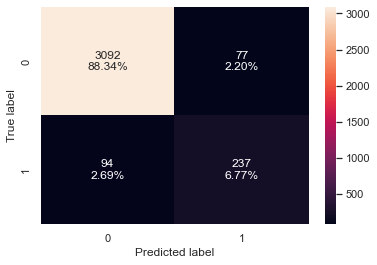

In [64]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [65]:
#get training data metrics
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.951143  0.716012   0.754777  0.734884

In [66]:
#Get test data metrics
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0  0.944667  0.630872   0.770492  0.693727

Precision-Recall curve threshold didn't make improvement as recall number is much lower than with ROC curve metrics

In [67]:
#Let's summarize on training data:

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.134 Threshold",
    "Logistic Regression-0.37 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.134 Threshold  \
Accuracy                      0.953714                             0.917714   
Recall                        0.637462                             0.879154   
Precision                     0.833992                             0.539889   
F1                            0.722603                             0.668966   

           Logistic Regression-0.37 Threshold  
Accuracy                             0.951143  
Recall                               0.716012  
Precision                            0.754777  
F1                                   0.734884

In [68]:
#Let's summarize on test data:

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.134 Threshold",
    "Logistic Regression-0.37 Threshold",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Logistic Regression sklearn  Logistic Regression-0.134 Threshold  \
Accuracy                      0.946000                             0.913333   
Recall                        0.577181                             0.845638   
Precision                     0.826923                             0.540773   
F1                            0.679842                             0.659686   

           Logistic Regression-0.37 Threshold  
Accuracy                             0.944667  
Recall                               0.630872  
Precision                            0.770492  
F1                                   0.693727

Since we mostly care about Recall (False Negative) we should go with the threshold = 0.134 of ROC curve. As it's shown the best result on both train and test data.

#  For comparison purposes, let's build a model using Decision tree

In [69]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [70]:
#Build DT model
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [71]:
#Scoring our Decision Tree
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.98


Very good results for Accuracy, train and test data results are pretty close.

In [72]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.87248322147651


There is a definite overfit on training set, as numbers are different.

### Visualizing the Decision Tree

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'City_Anaheim', 'City_Bakerfield', 'City_Berkley', 'City_Fresno', 'City_Glendale', 'City_Indio', 'City_Inglewood', 'City_Irvine', 'City_Long Beach', 'City_Los Angeles', 'City_Mojave', 'City_North Hollywood', 'City_Oakland', 'City_Palo Alto', 'City_Pasadena', 'City_Rancho Cucamonga', 'City_Richmond', 'City_Riverside', 'City_Sacramento', 'City_Salinas', 'City_San Bernardino', 'City_San Diego', 'City_San Francisco', 'City_San Jose', 'City_San Luis Obispo', 'City_San Mateo', 'City_San Rafael', 'City_Santa Ana', 'City_Santa Barbara', 'City_Santa Monica', 'City_Stockton', 'City_Thousand Oaks', 'City_Torrance', 'City_Van Nuys 914', 'City_Ventura', 'City_Whittier']


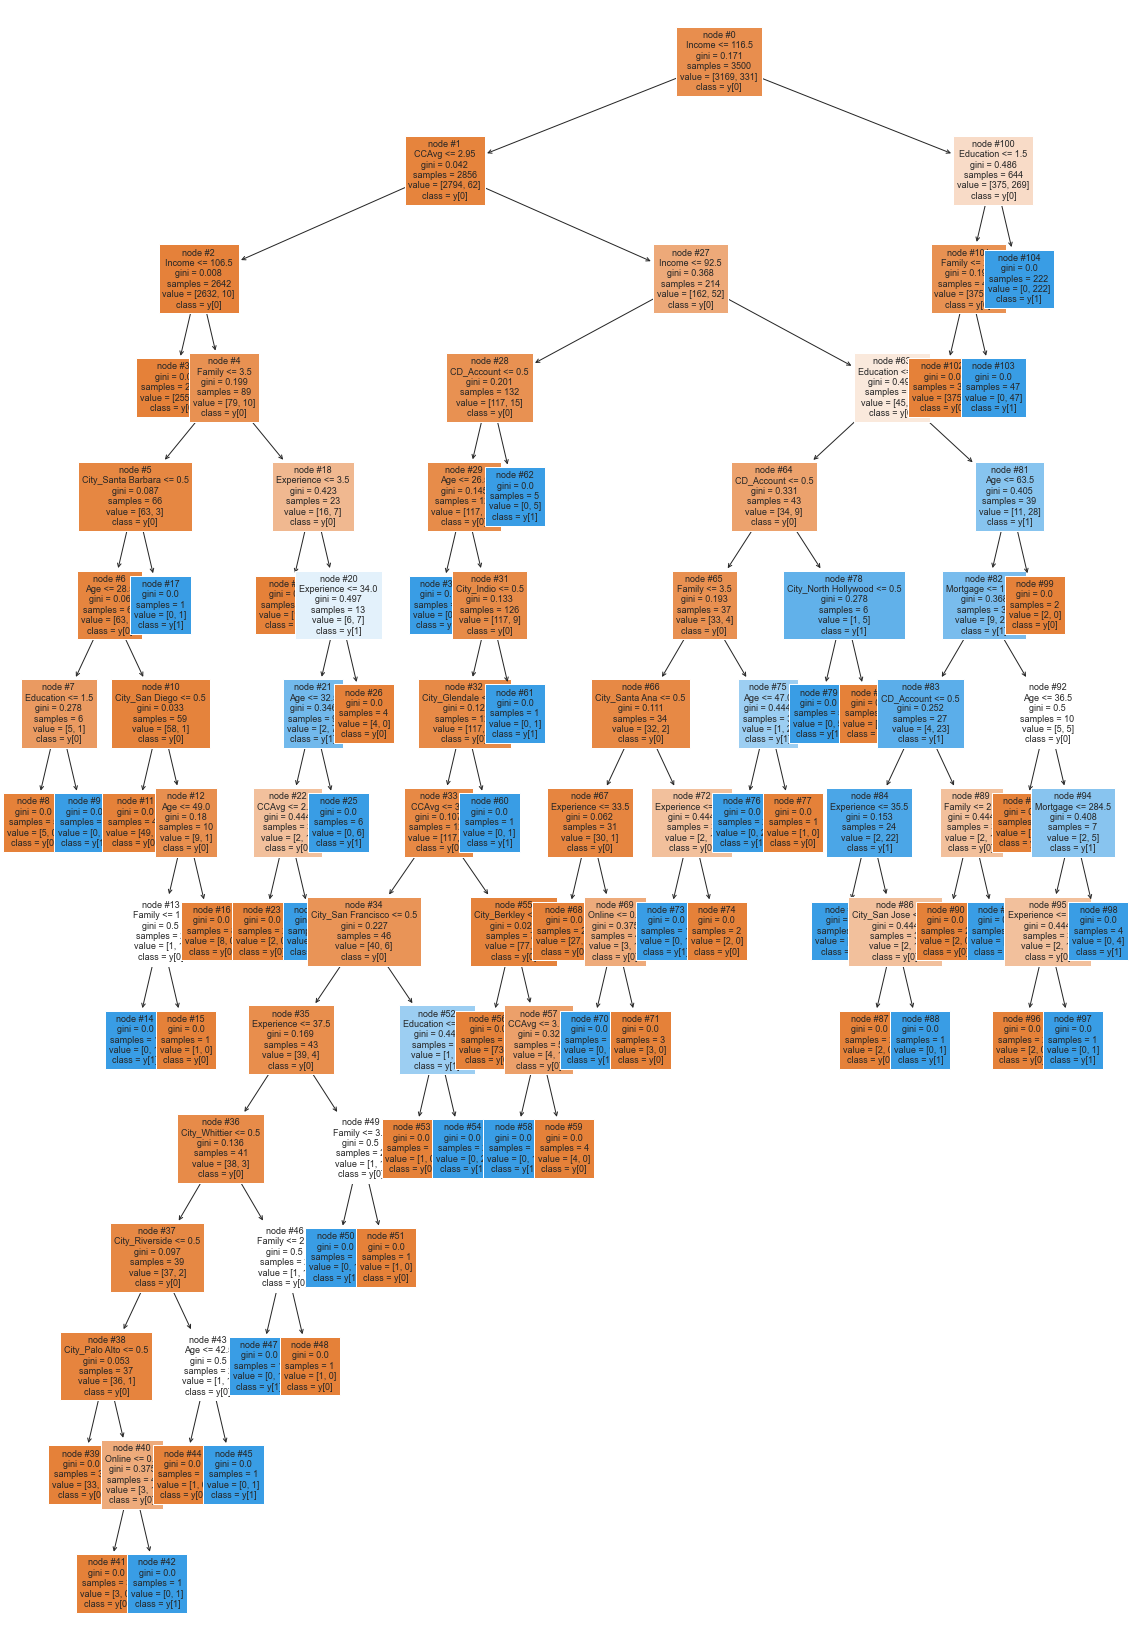

In [73]:
feature_names = list(X.columns)
print(feature_names)

plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [74]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- City_Santa Barbara <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- City_San Diego <= 0.50
|   |   |   |   |   |   |   |--- weights: [49.00, 0.00] class: 0
|   |   |   |   |   |   |--- City_San Diego >  0.50
|   |   |   |   |   |   |   |--- Age <= 49.00
|   |   |   |   |   |   |   |   |--- Family <= 1.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |--- Family >  1.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|  

In [75]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Education              0.405957
Income                 0.297816
Family                 0.153801
CCAvg                  0.044026
CD_Account             0.025711
Experience             0.021285
Age                    0.018656
Mortgage               0.005557
Online                 0.005005
City_Santa Barbara     0.003087
City_San Francisco     0.003079
City_Glendale          0.002947
City_Indio             0.002900
City_North Hollywood   0.002781
City_San Jose          0.002224
City_Riverside         0.001416
City_Whittier          0.001278
City_Santa Ana         0.000827
City_Palo Alto         0.000744
City_Berkley           0.000625
City_San Diego         0.000277
City_Anaheim           0.000000
City_Ventura           0.000000
City_Van Nuys 914      0.000000
City_Torrance          0.000000
City_Thousand Oaks     0.000000
City_Stockton          0.000000
City_Santa Monica      0.000000
Securities_Account     0.000000
City_San Rafael        0.000000
City_San

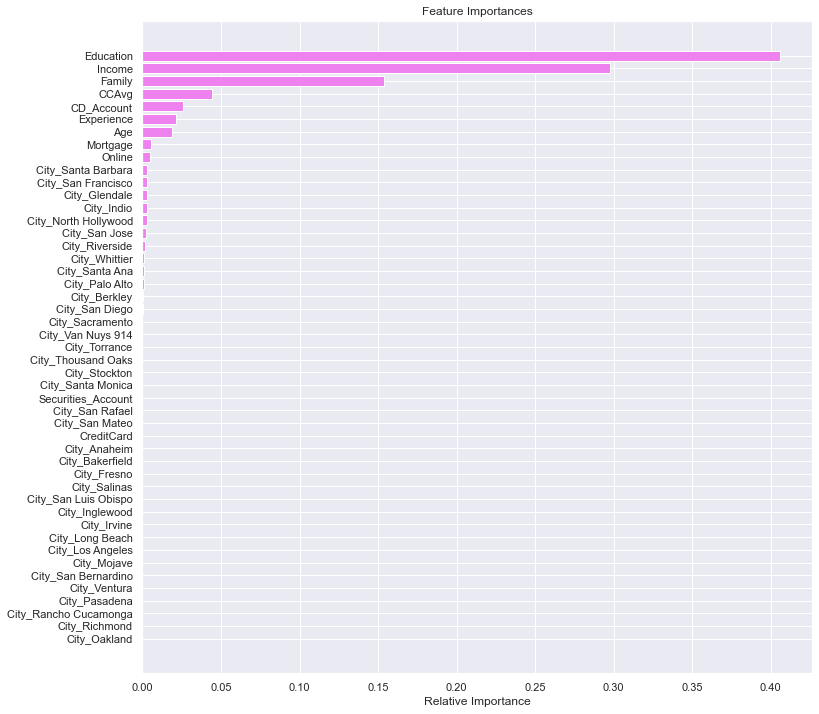

In [76]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Based on above Importance results: Education, Income, Family size are the features that has the most impact on building the model.

## Pre-pruning 

### Using GridSearch for Hyperparameter tuning of our tree model

In [77]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

In [78]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9897142857142858
Accuracy on test set :  0.9813333333333333
Recall on training set :  0.9274924471299094
Recall on test set :  0.8791946308724832


Recall looks much better, train number is closer to test data

## Visualizing Decision Tree

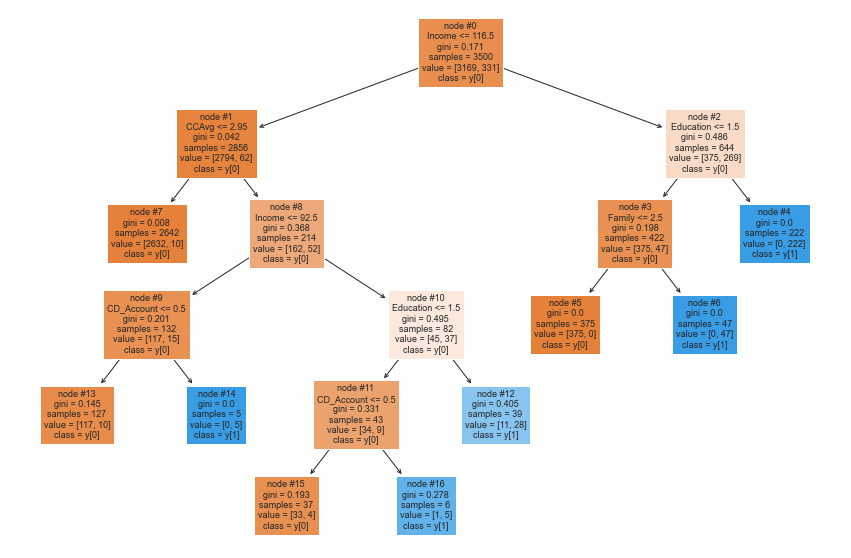

In [79]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

Very well trimmed tree with 5 levels(max_depth))

In [80]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                            Imp
Education              0.447999
Income                 0.328713
Family                 0.155711
CCAvg                  0.042231
CD_Account             0.025345
Age                    0.000000
City_San Mateo         0.000000
City_Riverside         0.000000
City_Sacramento        0.000000
City_Salinas           0.000000
City_San Bernardino    0.000000
City_San Diego         0.000000
City_San Francisco     0.000000
City_San Jose          0.000000
City_San Luis Obispo   0.000000
City_Santa Barbara     0.000000
City_San Rafael        0.000000
City_Santa Ana         0.000000
City_Rancho Cucamonga  0.000000
City_Santa Monica      0.000000
City_Stockton          0.000000
City_Thousand Oaks     0.000000
City_Torrance          0.000000
City_Van Nuys 914      0.000000
City_Ventura           0.000000
City_Richmond          0.000000
City_Oakland           0.000000
City_Pasadena          0.000000
City_Palo Alto         0.000000
Mortgage               0.000000
Securiti

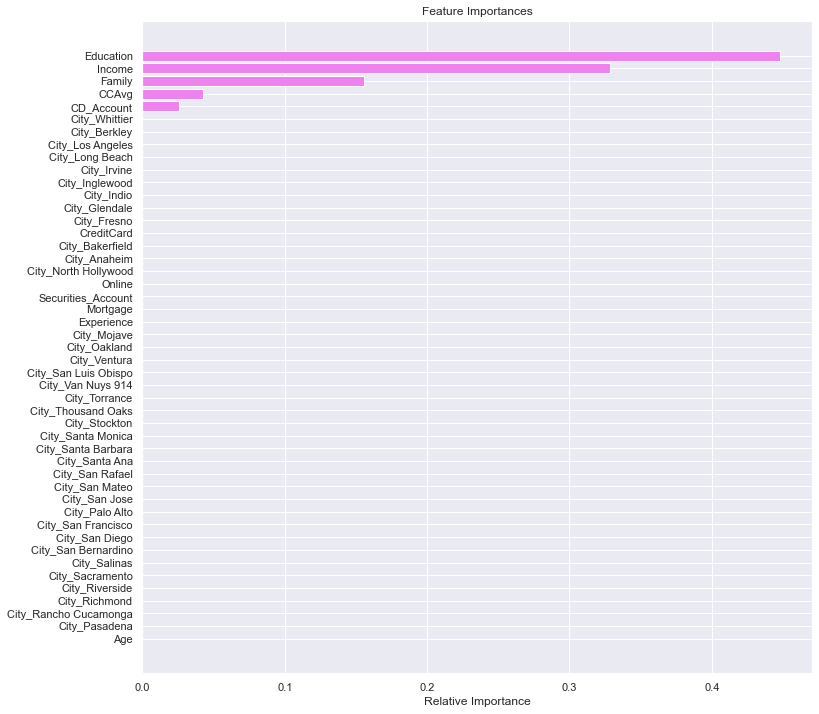

In [81]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Pre-pruning trimmed nodes, except living the most important features: Education,Income, Family size, CCAvg

## Post-pruning

In [82]:
#Creating the model along with getting alpha
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

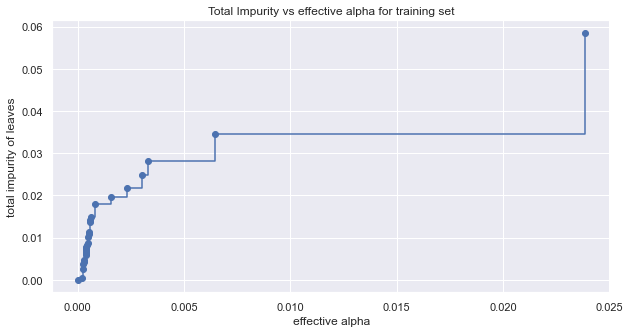

In [83]:
#Visuzlize the alpha steps
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [84]:
#Get the alpha number 
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


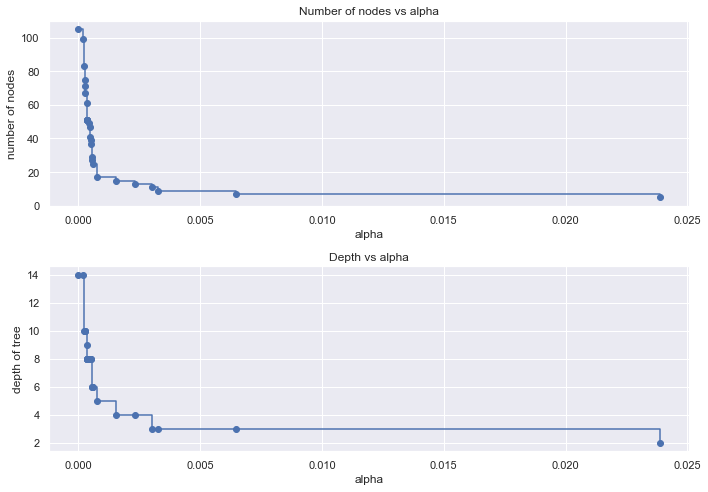

In [85]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

As number of nodes, and depth of the tree decreases, alpha(error) increases

In [86]:
#Get train/test scores
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

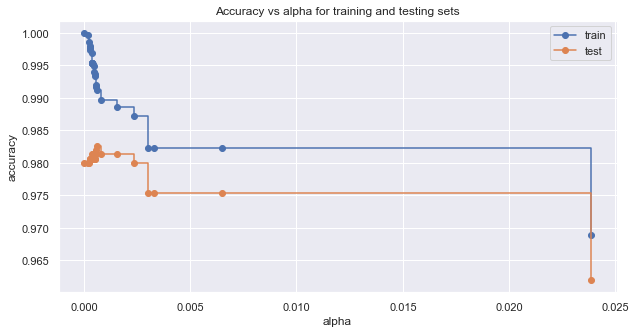

In [87]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [88]:
#Get the score
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)
Training accuracy of best model:  0.9911428571428571
Test accuracy of best model:  0.9826666666666667


Accuracy looks good and close between train and test data, with ccp_alpha = 0.0006

### Accuracy looks pretty good for both train and test data. Let's get the Recall

In [89]:
#get recall on train
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [90]:
#get recall on test
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

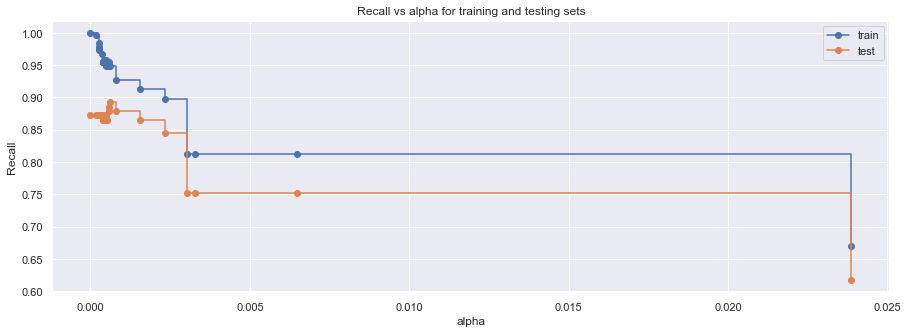

In [91]:
#Visualize it
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [92]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


In [93]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.9486404833836858
Recall on test set :  0.8926174496644296


Good results on Recall. Higher and close between train and test

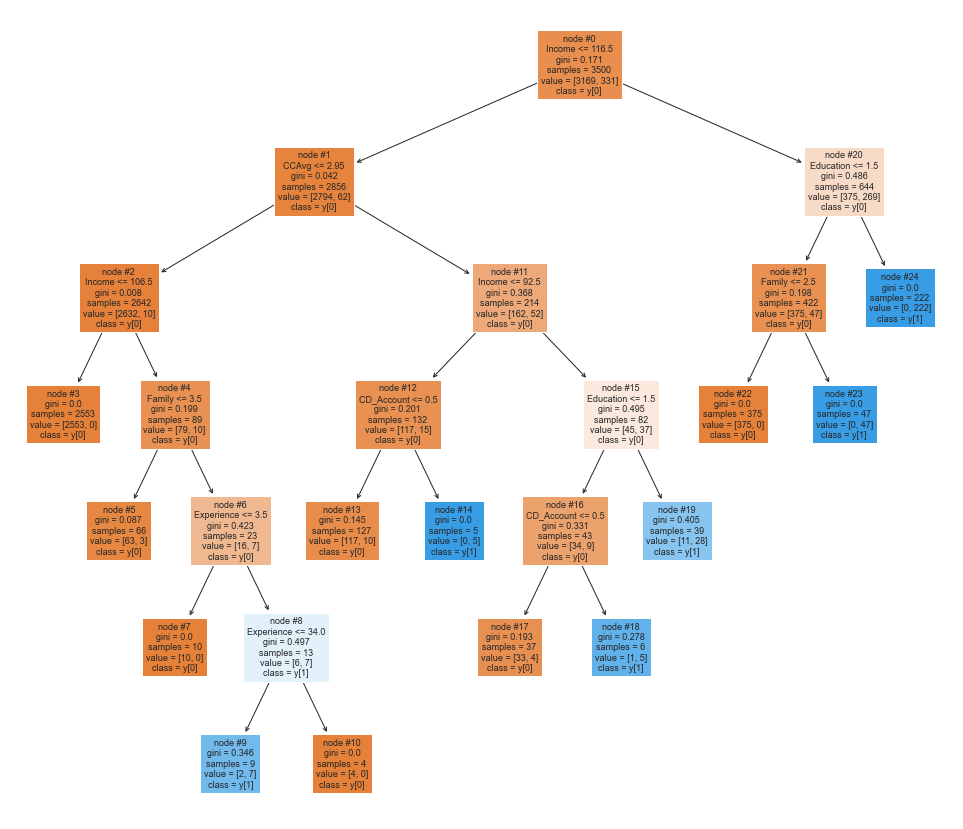

In [94]:
# Visualizing the Decision Tree

plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

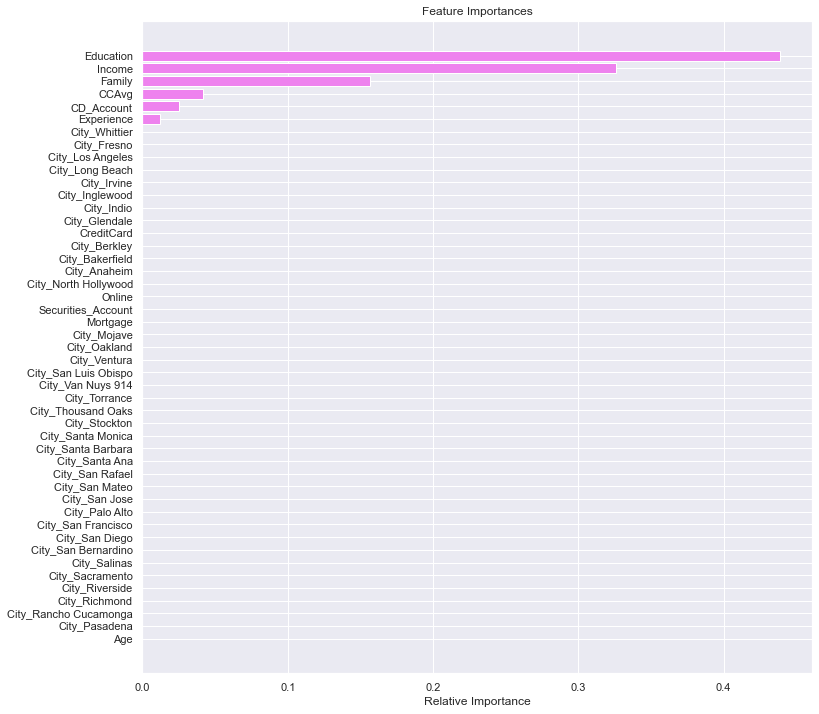

In [95]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [96]:
# Comparing all the decision tree models
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model', 'Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[1,0.93,0.95], 'Test_Recall':[0.87,0.88,0.89]}) 
comparison_frame

Model  Train_Recall  Test_Recall
0                Initial decision tree model          1.00         0.87
1  Decision treee with hyperparameter tuning          0.93         0.88
2            Decision tree with post-pruning          0.95         0.89

Based on above results we are gonna stick to Post-pruning results, as those show the best results, even though Pre-pruning results look not bad either.

# Insights:

*The LogisticRegression's Recall is 85%	with threshold=0.134 on Test dataset.

*The Decision Tree's Recall is 89% with ccp_alpha = 0.0006 on Test dataset.

Suggestions based on both of the models:

* Number of family members and CCAvg are interdependent on each other, causing the necessety to obtain Loans to cover the expenses. Marketing department could add a filter on specification of above fields on customer information to identify the potential customers who will be interested in obtaining the Personal_Loan.

* Search should include people with higher Education which tends to result in a higher Income as number of Experience years grow, hence can afford the Loans.

* Bank should target young customers who own CreditCards issued by the bank, and do a promotion for loyal customers/customers who own the accounts at the All life Bank.

